# ML-Based Trust and Reputation System for Node Authentication
## Phase 1: Data Exploration & Preprocessing

**Dataset:** NSL-KDD Network Intrusion Detection Dataset  
**Goal:** Classify network connections as normal (trusted) or anomaly (malicious)  
**ML Algorithm:** Support Vector Machine (SVM)

## 1.1 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 1.2 Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")

Dataset loaded successfully!
Shape: (22544, 43)
Total Records: 22,544
Total Features: 43


## 1.3 Initial Data Exploration

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print("="*80)
df.head()

First 5 rows of the dataset:


,id,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
0,1,0,tcp,private,REJ,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,2,0,tcp,private,REJ,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,3,2,tcp,ftp_data,SF,12983,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,4,0,icmp,eco_i,SF,20,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,5,1,tcp,telnet,RSTO,0,15,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [4]:
# Dataset information
print("\nDataset Information:")
print("="*80)
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             22544 non-null  int64  
 1   'duration'                     22544 non-null  int64  
 2   'protocol_type'                22544 non-null  object 
 3   'service'                      22544 non-null  object 
 4   'flag'                         22544 non-null  object 
 5   'src_bytes'                    22544 non-null  int64  
 6   'dst_bytes'                    22544 non-null  int64  
 7   'land'                         22544 non-null  int64  
 8   'wrong_fragment'               22544 non-null  int64  
 9   'urgent'                       22544 non-null  int64  
 10  'hot'                          22544 non-null  int64  
 11  'num_failed_logins'            22544 non-null  int64  
 12  'logged_in'             

In [5]:
# Statistical summary
print("\nStatistical Summary (Numerical Features):")
print("="*80)
df.describe()


Statistical Summary (Numerical Features):


,id,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
count,22544.00000,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,11272.50000,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,6508.03657,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,1.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5636.75000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11272.50000,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16908.25000,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,22544.00000,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check for missing values
print("\nMissing Values:")
print("="*80)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(missing[missing > 0])


Missing Values:
✓ No missing values found in the dataset!


In [8]:
# Check column names and clean if needed
print("Original column names:")
print(df.columns.tolist())

# Clean column names (remove quotes)
df.columns = df.columns.str.strip().str.replace("'", "")
print("\n✓ Column names cleaned!")
print("\nCleaned column names:")
print(df.columns.tolist())

Original column names:
['id', "'duration'", "'protocol_type'", "'service'", "'flag'", "'src_bytes'", "'dst_bytes'", "'land'", "'wrong_fragment'", "'urgent'", "'hot'", "'num_failed_logins'", "'logged_in'", "'num_compromised'", "'root_shell'", "'su_attempted'", "'num_root'", "'num_file_creations'", "'num_shells'", "'num_access_files'", "'num_outbound_cmds'", "'is_host_login'", "'is_guest_login'", "'count'", "'srv_count'", "'serror_rate'", "'srv_serror_rate'", "'rerror_rate'", "'srv_rerror_rate'", "'same_srv_rate'", "'diff_srv_rate'", "'srv_diff_host_rate'", "'dst_host_count'", "'dst_host_srv_count'", "'dst_host_same_srv_rate'", "'dst_host_diff_srv_rate'", "'dst_host_same_src_port_rate'", "'dst_host_srv_diff_host_rate'", "'dst_host_serror_rate'", "'dst_host_srv_serror_rate'", "'dst_host_rerror_rate'", "'dst_host_srv_rerror_rate'", "'class'"]

✓ Column names cleaned!

Cleaned column names:
['id', 'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragm

## 1.4 Target Variable Analysis (Class Distribution)

Class Distribution:
class
anomaly    12833
normal      9711
Name: count, dtype: int64

Percentages:
class
anomaly    56.924237
normal     43.075763
Name: proportion, dtype: float64


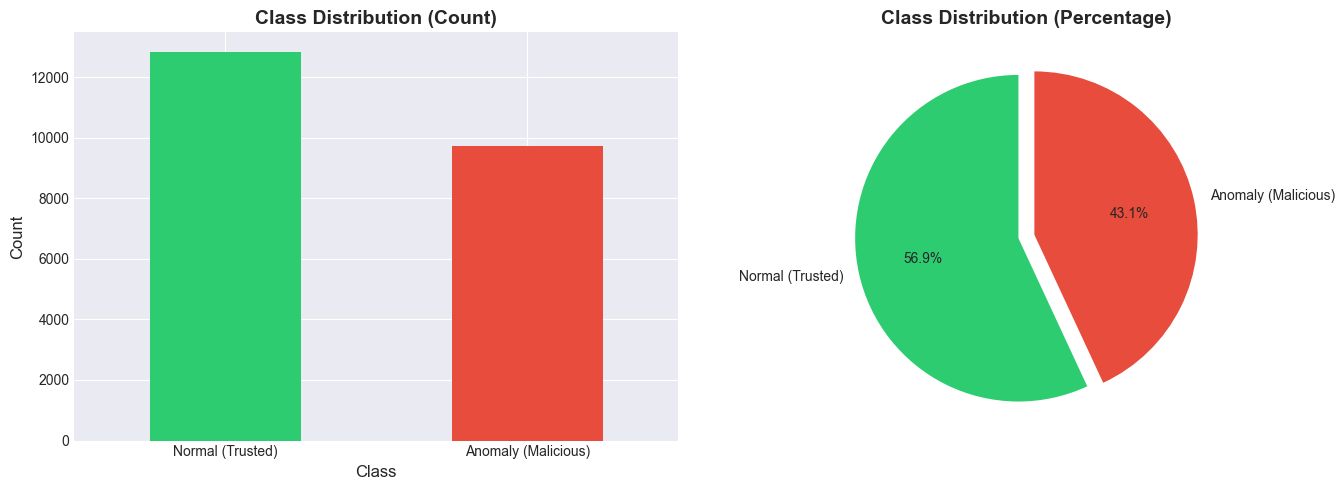


⚠ Class Imbalance Ratio: 1.32:1


In [9]:
# Analyze class distribution
print("Class Distribution:")
print("="*80)
class_counts = df['class'].value_counts()
print(class_counts)
print(f"\nPercentages:")
print(df['class'].value_counts(normalize=True) * 100)

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
class_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Normal (Trusted)', 'Anomaly (Malicious)'], rotation=0)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(class_counts, labels=['Normal (Trusted)', 'Anomaly (Malicious)'], 
            autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05))
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\n⚠ Class Imbalance Ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print("⚠ Dataset is imbalanced - may need to address this during model training")

## 1.5 Categorical Features Analysis

In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('class')  # Remove target variable

print(f"Categorical Features: {categorical_cols}")
print(f"Number of Categorical Features: {len(categorical_cols)}")
print("\n" + "="*80)

# Analyze each categorical feature
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Top 5 values:")
    print(df[col].value_counts().head())
    print("-"*80)

Categorical Features: ['protocol_type', 'service', 'flag']
Number of Categorical Features: 3


PROTOCOL_TYPE:
Unique values: 3
Top 5 values:
protocol_type
tcp     18880
udp      2621
icmp     1043
Name: count, dtype: int64
--------------------------------------------------------------------------------

SERVICE:
Unique values: 64
Top 5 values:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64
--------------------------------------------------------------------------------

FLAG:
Unique values: 11
Top 5 values:
flag
SF      14875
REJ      3850
S0       2013
RSTO      773
RSTR      669
Name: count, dtype: int64
--------------------------------------------------------------------------------


## 1.6 Data Preprocessing

In [11]:
# Create a copy for preprocessing
df_processed = df.copy()

# Drop the 'id' column as it's not needed for classification
if 'id' in df_processed.columns:
    df_processed = df_processed.drop('id', axis=1)
    print("✓ 'id' column dropped")

print(f"\nDataset shape after dropping id: {df_processed.shape}")

✓ 'id' column dropped

Dataset shape after dropping id: (22544, 42)


In [12]:
# Encode categorical variables using Label Encoding
print("Encoding categorical variables...")
print("="*80)

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"✓ {col}: {len(le.classes_)} unique values encoded")

print(f"\n✓ All categorical variables encoded successfully!")

Encoding categorical variables...
✓ protocol_type: 3 unique values encoded
✓ service: 64 unique values encoded
✓ flag: 11 unique values encoded

✓ All categorical variables encoded successfully!


In [13]:
# Encode target variable (class)
print("Encoding target variable (class)...")
le_class = LabelEncoder()
df_processed['class'] = le_class.fit_transform(df_processed['class'])

# Display mapping
print("\nClass Mapping:")
for idx, class_name in enumerate(le_class.classes_):
    print(f"  {class_name} → {idx}")

print("\n✓ Target variable encoded successfully!")

Encoding target variable (class)...

Class Mapping:
  anomaly → 0
  normal → 1

✓ Target variable encoded successfully!


## 1.7 Split Features and Target

In [14]:
# Separate features (X) and target (y)
X = df_processed.drop('class', axis=1)
y = df_processed['class']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")

Features (X) shape: (22544, 41)
Target (y) shape: (22544,)

Number of features: 41


## 1.8 Train-Test Split

In [15]:
# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Dataset split into training and testing sets:")
print("="*80)
print(f"Training set size: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Check class distribution in train and test sets
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())

Dataset split into training and testing sets:
Training set size: 15,780 samples (70.0%)
Testing set size: 6,764 samples (30.0%)

Training set shape: (15780, 41)
Testing set shape: (6764, 41)

Class distribution in training set:
class
0    8983
1    6797
Name: count, dtype: int64

Class distribution in testing set:
class
0    3850
1    2914
Name: count, dtype: int64


## 1.9 Feature Scaling (Normalization)

In [16]:
# Scale features using StandardScaler (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed using StandardScaler")
print("="*80)
print("\nBefore scaling (first 5 features of first sample):")
print(X_train.iloc[0, :5].values)
print("\nAfter scaling (first 5 features of first sample):")
print(X_train_scaled[0, :5])
print("\n✓ Features normalized successfully!")
print("   (Mean ≈ 0, Standard Deviation ≈ 1)")

Feature scaling completed using StandardScaler

Before scaling (first 5 features of first sample):
[ 0.  1. 45.  5.  0.]

After scaling (first 5 features of first sample):
[-0.14900117 -0.18182663  0.93967106 -0.58612237 -0.11044075]

✓ Features normalized successfully!
   (Mean ≈ 0, Standard Deviation ≈ 1)


## 1.10 Phase 1 Summary

In [17]:
print("="*80)
print("PHASE 1: DATA EXPLORATION & PREPROCESSING - COMPLETED ✓")
print("="*80)
print("\nSummary:")
print(f"  📊 Total Records: {len(df):,}")
print(f"  📈 Total Features: {X.shape[1]}")
print(f"  🏷️  Categorical Features: {len(categorical_cols)}")
print(f"  🔢 Numerical Features: {X.shape[1] - len(categorical_cols)}")
print(f"  🎯 Target Classes: {len(le_class.classes_)} (Normal vs Anomaly)")
print(f"\n  🔄 Training Samples: {X_train_scaled.shape[0]:,}")
print(f"  🧪 Testing Samples: {X_test_scaled.shape[0]:,}")
print("\n✅ Data is ready for Phase 2: SVM Model Development!")
print("="*80)

PHASE 1: DATA EXPLORATION & PREPROCESSING - COMPLETED ✓

Summary:
  📊 Total Records: 22,544
  📈 Total Features: 41
  🏷️  Categorical Features: 3
  🔢 Numerical Features: 38
  🎯 Target Classes: 2 (Normal vs Anomaly)

  🔄 Training Samples: 15,780
  🧪 Testing Samples: 6,764

✅ Data is ready for Phase 2: SVM Model Development!


# Phase 2: Feature Engineering

In this phase, we'll analyze feature importance, correlations, and optimize our feature set for better SVM performance.

## 2.1 Correlation Analysis

In [18]:
# Calculate correlation matrix
print("Calculating correlation matrix...")
correlation_matrix = df_processed.corr()

# Find highly correlated features (threshold > 0.9)
high_corr_threshold = 0.9
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append({
                'Feature1': correlation_matrix.columns[i],
                'Feature2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

print(f"\n✓ Found {len(high_corr_pairs)} highly correlated feature pairs (|correlation| > {high_corr_threshold})")
if high_corr_pairs:
    print("\nHighly Correlated Features:")
    for pair in high_corr_pairs:
        print(f"  • {pair['Feature1']} ↔ {pair['Feature2']}: {pair['Correlation']:.3f}")

Calculating correlation matrix...

✓ Found 14 highly correlated feature pairs (|correlation| > 0.9)

Highly Correlated Features:
  • flag ↔ rerror_rate: -0.912
  • flag ↔ srv_rerror_rate: -0.916
  • flag ↔ dst_host_srv_rerror_rate: -0.912
  • num_compromised ↔ num_root: 0.996
  • serror_rate ↔ srv_serror_rate: 0.966
  • serror_rate ↔ dst_host_serror_rate: 0.904
  • serror_rate ↔ dst_host_srv_serror_rate: 0.901
  • srv_serror_rate ↔ dst_host_srv_serror_rate: 0.921
  • rerror_rate ↔ srv_rerror_rate: 0.976
  • rerror_rate ↔ dst_host_srv_rerror_rate: 0.931
  • srv_rerror_rate ↔ dst_host_srv_rerror_rate: 0.948
  • dst_host_srv_count ↔ dst_host_same_srv_rate: 0.904
  • dst_host_serror_rate ↔ dst_host_srv_serror_rate: 0.945
  • dst_host_rerror_rate ↔ dst_host_srv_rerror_rate: 0.905


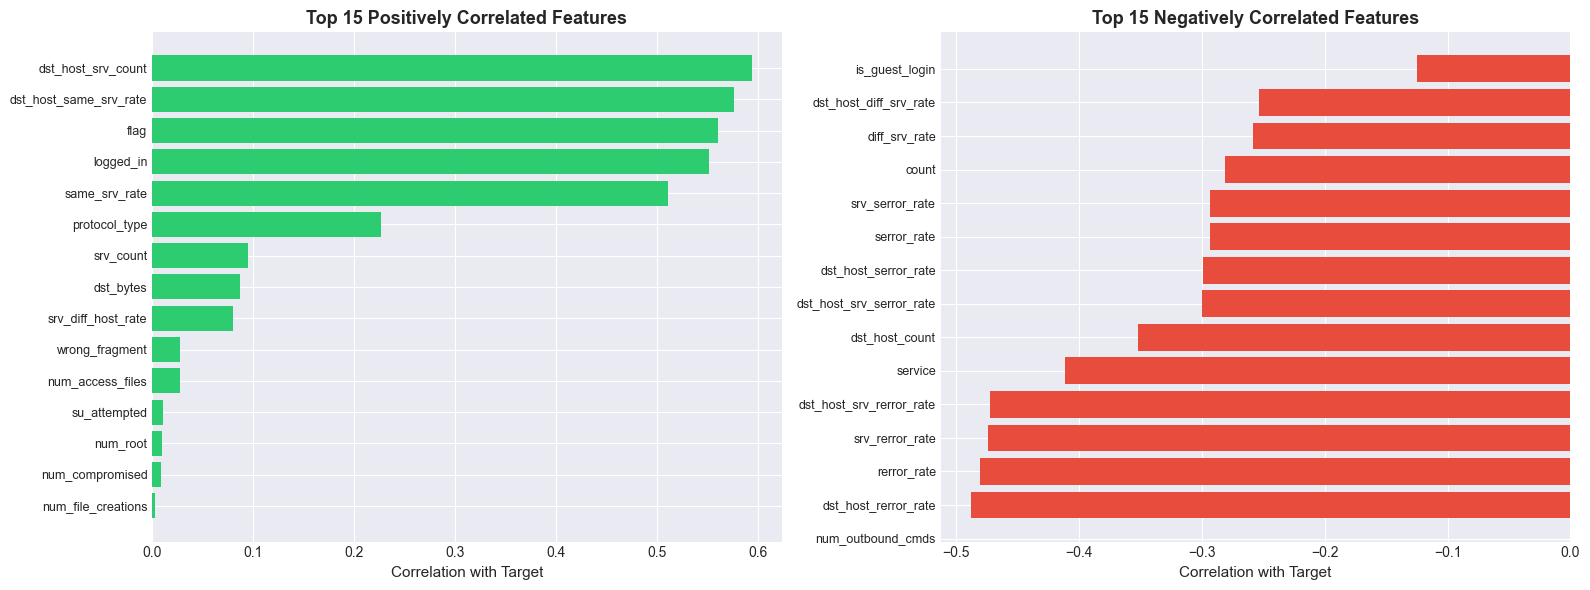


Top 10 features most correlated with target:
dst_host_srv_count        0.593344
dst_host_same_srv_rate    0.575526
flag                      0.560327
logged_in                 0.551159
same_srv_rate             0.510634
protocol_type             0.226362
srv_count                 0.094713
dst_bytes                 0.086466
srv_diff_host_rate        0.080156
wrong_fragment            0.027739
Name: class, dtype: float64


In [19]:
# Visualize correlation with target variable
target_corr = correlation_matrix['class'].drop('class').sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top positive correlations
top_positive = target_corr.head(15)
axes[0].barh(range(len(top_positive)), top_positive.values, color='#2ecc71')
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(top_positive.index, fontsize=9)
axes[0].set_xlabel('Correlation with Target', fontsize=11)
axes[0].set_title('Top 15 Positively Correlated Features', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()

# Top negative correlations
top_negative = target_corr.tail(15)
axes[1].barh(range(len(top_negative)), top_negative.values, color='#e74c3c')
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(top_negative.index, fontsize=9)
axes[1].set_xlabel('Correlation with Target', fontsize=11)
axes[1].set_title('Top 15 Negatively Correlated Features', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 10 features most correlated with target:")
print(target_corr.head(10))

## 2.2 Feature Importance using Random Forest

In [20]:
# Use Random Forest to determine feature importance
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest for feature importance analysis...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n✓ Random Forest trained successfully!")
print(f"\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

Training Random Forest for feature importance analysis...

✓ Random Forest trained successfully!

Top 10 Most Important Features:
                 Feature  Importance
               src_bytes    0.164280
               dst_bytes    0.120737
  dst_host_same_srv_rate    0.083936
  dst_host_diff_srv_rate    0.072256
      dst_host_srv_count    0.068649
                 service    0.066590
    dst_host_rerror_rate    0.053368
                duration    0.038881
dst_host_srv_rerror_rate    0.034556
               logged_in    0.032806


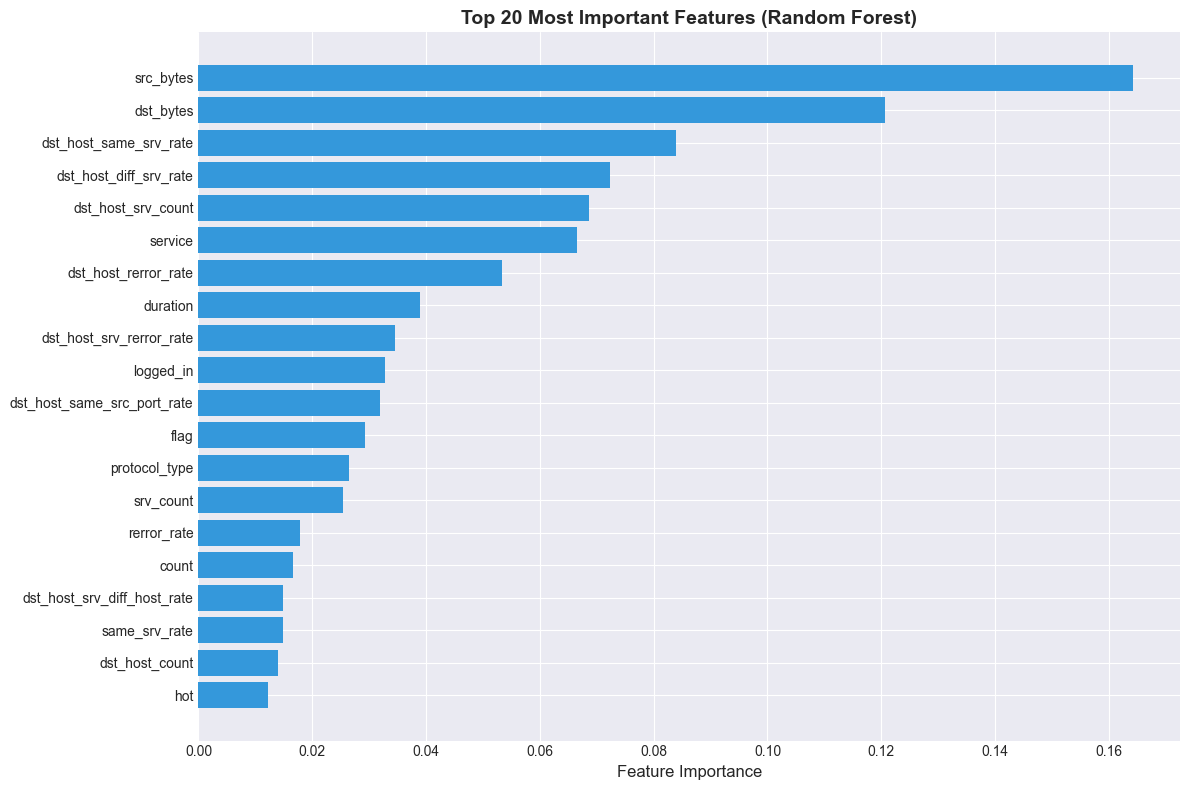


Number of features needed for 95% cumulative importance: 21
Number of features needed for 90% cumulative importance: 17


In [21]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['Importance'].values, color='#3498db')
plt.yticks(range(len(top_features)), top_features['Feature'].values, fontsize=10)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 20 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Calculate cumulative importance
feature_importance['Cumulative_Importance'] = feature_importance['Importance'].cumsum()
print(f"\nNumber of features needed for 95% cumulative importance: {len(feature_importance[feature_importance['Cumulative_Importance'] <= 0.95])}")
print(f"Number of features needed for 90% cumulative importance: {len(feature_importance[feature_importance['Cumulative_Importance'] <= 0.90])}")

## 2.3 Feature Selection Strategy

In [22]:
# Strategy 1: Select top K important features
# We'll create multiple feature sets for comparison

# Full feature set (baseline)
full_features = X.columns.tolist()

# Top 30 features based on Random Forest importance
top_30_features = feature_importance.head(30)['Feature'].tolist()

# Top 20 features
top_20_features = feature_importance.head(20)['Feature'].tolist()

# Top 15 features
top_15_features = feature_importance.head(15)['Feature'].tolist()

print("Feature Selection Strategies Created:")
print("="*80)
print(f"1. Full Feature Set: {len(full_features)} features")
print(f"2. Top 30 Features: {len(top_30_features)} features")
print(f"3. Top 20 Features: {len(top_20_features)} features")
print(f"4. Top 15 Features: {len(top_15_features)} features")
print("\n✓ We'll compare SVM performance across these feature sets in Phase 3")

Feature Selection Strategies Created:
1. Full Feature Set: 41 features
2. Top 30 Features: 30 features
3. Top 20 Features: 20 features
4. Top 15 Features: 15 features

✓ We'll compare SVM performance across these feature sets in Phase 3


## 2.4 Remove Highly Correlated Features

In [23]:
# Remove one feature from each highly correlated pair (keep the more important one)
features_to_remove = set()

for pair in high_corr_pairs:
    feat1 = pair['Feature1']
    feat2 = pair['Feature2']
    
    # Get importance ranks
    rank1 = feature_importance[feature_importance['Feature'] == feat1].index[0] if feat1 in feature_importance['Feature'].values else 999
    rank2 = feature_importance[feature_importance['Feature'] == feat2].index[0] if feat2 in feature_importance['Feature'].values else 999
    
    # Remove the less important feature
    if rank1 < rank2:
        features_to_remove.add(feat2)
    else:
        features_to_remove.add(feat1)

# Create reduced feature set
reduced_features = [f for f in full_features if f not in features_to_remove]

print(f"Features removed due to high correlation: {len(features_to_remove)}")
if features_to_remove:
    print(f"Removed features: {list(features_to_remove)}")
print(f"\n✓ Reduced feature set: {len(reduced_features)} features (from {len(full_features)})")

Features removed due to high correlation: 8
Removed features: ['dst_host_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'dst_host_same_srv_rate', 'num_root', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']

✓ Reduced feature set: 33 features (from 41)


## 2.5 Create Optimized Feature Sets for SVM

In [24]:
# Prepare different feature sets for model training
feature_sets = {
    'Full_Features': {
        'features': full_features,
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'description': 'All 41 features'
    },
    'Reduced_Corr': {
        'features': reduced_features,
        'X_train': scaler.fit_transform(X_train[reduced_features]),
        'X_test': scaler.transform(X_test[reduced_features]),
        'description': f'{len(reduced_features)} features (removed highly correlated)'
    },
    'Top_30': {
        'features': top_30_features,
        'X_train': scaler.fit_transform(X_train[top_30_features]),
        'X_test': scaler.transform(X_test[top_30_features]),
        'description': 'Top 30 most important features'
    },
    'Top_20': {
        'features': top_20_features,
        'X_train': scaler.fit_transform(X_train[top_20_features]),
        'X_test': scaler.transform(X_test[top_20_features]),
        'description': 'Top 20 most important features'
    },
    'Top_15': {
        'features': top_15_features,
        'X_train': scaler.fit_transform(X_train[top_15_features]),
        'X_test': scaler.transform(X_test[top_15_features]),
        'description': 'Top 15 most important features'
    }
}

print("Feature Sets Prepared for SVM Training:")
print("="*80)
for name, info in feature_sets.items():
    print(f"✓ {name}: {info['description']} - Shape: {info['X_train'].shape}")

Feature Sets Prepared for SVM Training:
✓ Full_Features: All 41 features - Shape: (15780, 41)
✓ Reduced_Corr: 33 features (removed highly correlated) - Shape: (15780, 33)
✓ Top_30: Top 30 most important features - Shape: (15780, 30)
✓ Top_20: Top 20 most important features - Shape: (15780, 20)
✓ Top_15: Top 15 most important features - Shape: (15780, 15)


## 2.6 Visualize Feature Distributions

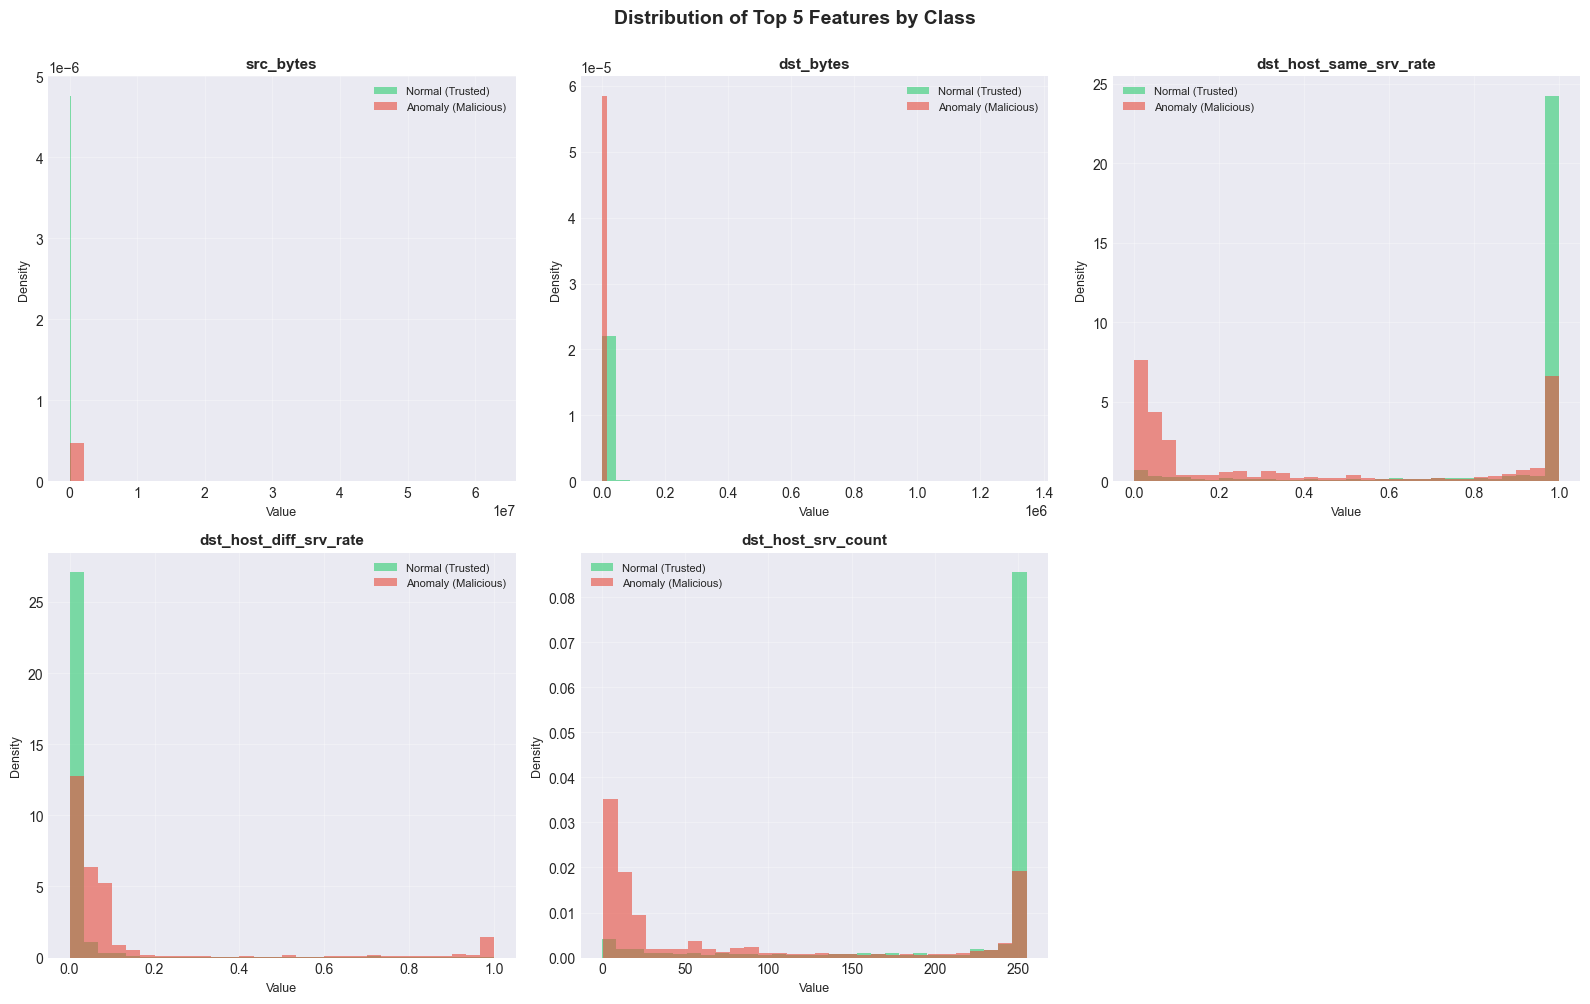

✓ Feature distributions visualized for top 5 features


In [25]:
# Visualize distribution of top features by class
top_5_features = feature_importance.head(5)['Feature'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_5_features):
    # Create separate distributions for normal and anomaly
    normal_data = df_processed[df_processed['class'] == 1][feature]
    anomaly_data = df_processed[df_processed['class'] == 0][feature]
    
    axes[idx].hist(normal_data, bins=30, alpha=0.6, label='Normal (Trusted)', color='#2ecc71', density=True)
    axes[idx].hist(anomaly_data, bins=30, alpha=0.6, label='Anomaly (Malicious)', color='#e74c3c', density=True)
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Density', fontsize=9)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.suptitle('Distribution of Top 5 Features by Class', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Feature distributions visualized for top 5 features")

## 2.7 Phase 2 Summary

In [26]:
print("="*80)
print("PHASE 2: FEATURE ENGINEERING - COMPLETED ✓")
print("="*80)
print("\nFeature Analysis Summary:")
print(f"  📊 Correlation Analysis: Identified {len(high_corr_pairs)} highly correlated pairs")
print(f"  🌲 Random Forest Importance: Top feature identified")
print(f"  🎯 Feature Selection: Created 5 optimized feature sets")
print(f"  📉 Dimensionality Reduction: From 41 to 15-41 features")
print("\nTop 5 Most Important Features:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {i+1}. {row['Feature']}: {row['Importance']:.4f}")

print("\nFeature Sets Ready:")
print(f"  1. Full Features: {len(feature_sets['Full_Features']['features'])} features")
print(f"  2. Reduced Correlation: {len(feature_sets['Reduced_Corr']['features'])} features")
print(f"  3. Top 30: {len(feature_sets['Top_30']['features'])} features")
print(f"  4. Top 20: {len(feature_sets['Top_20']['features'])} features")
print(f"  5. Top 15: {len(feature_sets['Top_15']['features'])} features")

print("\n✅ Ready for Phase 3: SVM Model Development & Training!")
print("="*80)

PHASE 2: FEATURE ENGINEERING - COMPLETED ✓

Feature Analysis Summary:
  📊 Correlation Analysis: Identified 14 highly correlated pairs
  🌲 Random Forest Importance: Top feature identified
  🎯 Feature Selection: Created 5 optimized feature sets
  📉 Dimensionality Reduction: From 41 to 15-41 features

Top 5 Most Important Features:
  5. src_bytes: 0.1643
  6. dst_bytes: 0.1207
  34. dst_host_same_srv_rate: 0.0839
  35. dst_host_diff_srv_rate: 0.0723
  33. dst_host_srv_count: 0.0686

Feature Sets Ready:
  1. Full Features: 41 features
  2. Reduced Correlation: 33 features
  3. Top 30: 30 features
  4. Top 20: 20 features
  5. Top 15: 15 features

✅ Ready for Phase 3: SVM Model Development & Training!


# Phase 3: SVM Model Development & Training

In this phase, we'll train SVM models with different kernels and feature sets, then evaluate their performance for node authentication.

## 3.1 Import SVM and Evaluation Libraries

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.model_selection import cross_val_score, GridSearchCV
import time

print("✓ SVM and evaluation libraries imported successfully!")

✓ SVM and evaluation libraries imported successfully!


## 3.2 Baseline SVM with Linear Kernel

In [28]:
# Train baseline Linear SVM on full feature set
print("Training Baseline Linear SVM...")
print("="*80)

start_time = time.time()

# Create and train Linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test_scaled)

# Calculate training time
train_time = time.time() - start_time

# Evaluate
accuracy = accuracy_score(y_test, y_pred_linear)
precision = precision_score(y_test, y_pred_linear)
recall = recall_score(y_test, y_pred_linear)
f1 = f1_score(y_test, y_pred_linear)

print(f"\n✓ Linear SVM trained in {train_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")

Training Baseline Linear SVM...

✓ Linear SVM trained in 7.31 seconds

Performance Metrics:
  Accuracy:  0.9469 (94.69%)
  Precision: 0.9747
  Recall:    0.9001
  F1-Score:  0.9360


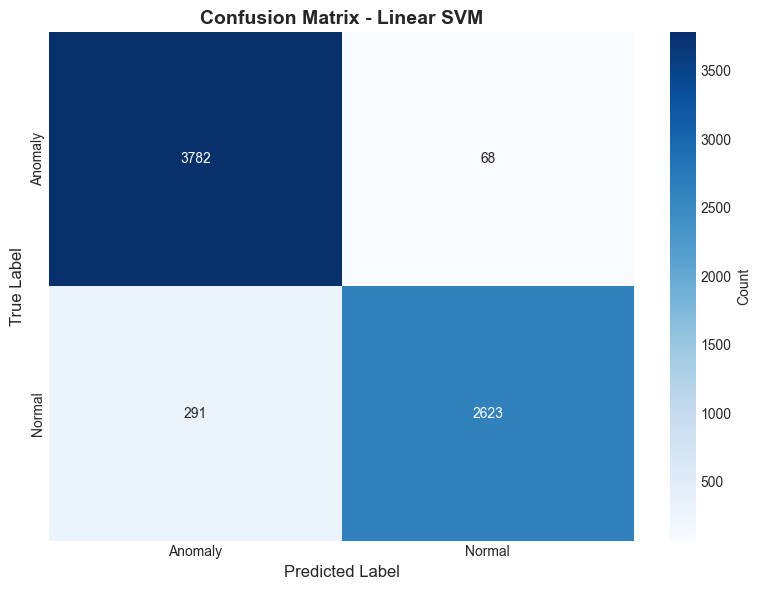


Confusion Matrix Breakdown:
  True Negatives (Anomaly correctly identified):  3782
  False Positives (Normal misclassified as Anomaly): 291
  False Negatives (Anomaly misclassified as Normal): 68
  True Positives (Normal correctly identified):   2623


In [29]:
# Confusion Matrix for Linear SVM
cm_linear = confusion_matrix(y_test, y_pred_linear)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Anomaly', 'Normal'], 
            yticklabels=['Anomaly', 'Normal'],
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title('Confusion Matrix - Linear SVM', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"  True Negatives (Anomaly correctly identified):  {cm_linear[0][0]}")
print(f"  False Positives (Normal misclassified as Anomaly): {cm_linear[1][0]}")
print(f"  False Negatives (Anomaly misclassified as Normal): {cm_linear[0][1]}")
print(f"  True Positives (Normal correctly identified):   {cm_linear[1][1]}")

## 3.3 SVM with RBF Kernel

In [30]:
# Train RBF SVM (Radial Basis Function - for non-linear patterns)
print("Training RBF Kernel SVM...")
print("="*80)

start_time = time.time()

# Create and train RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Calculate training time
train_time = time.time() - start_time

# Evaluate
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

print(f"\n✓ RBF SVM trained in {train_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {accuracy_rbf:.4f} ({accuracy_rbf*100:.2f}%)")
print(f"  Precision: {precision_rbf:.4f}")
print(f"  Recall:    {recall_rbf:.4f}")
print(f"  F1-Score:  {f1_rbf:.4f}")

print(f"\n📊 Improvement over Linear SVM:")
print(f"  Accuracy: {(accuracy_rbf - accuracy)*100:+.2f}%")

Training RBF Kernel SVM...

✓ RBF SVM trained in 3.97 seconds

Performance Metrics:
  Accuracy:  0.9624 (96.24%)
  Precision: 0.9836
  Recall:    0.9283
  F1-Score:  0.9552

📊 Improvement over Linear SVM:
  Accuracy: +1.55%


## 3.4 SVM with Polynomial Kernel

In [31]:
# Train Polynomial SVM
print("Training Polynomial Kernel SVM...")
print("="*80)

start_time = time.time()

# Create and train Polynomial SVM (degree 3)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_poly.fit(X_train_scaled, y_train)

# Make predictions
y_pred_poly = svm_poly.predict(X_test_scaled)

# Calculate training time
train_time = time.time() - start_time

# Evaluate
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

print(f"\n✓ Polynomial SVM trained in {train_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {accuracy_poly:.4f} ({accuracy_poly*100:.2f}%)")
print(f"  Precision: {precision_poly:.4f}")
print(f"  Recall:    {recall_poly:.4f}")
print(f"  F1-Score:  {f1_poly:.4f}")

Training Polynomial Kernel SVM...

✓ Polynomial SVM trained in 4.86 seconds

Performance Metrics:
  Accuracy:  0.9562 (95.62%)
  Precision: 0.9719
  Recall:    0.9252
  F1-Score:  0.9480


## 3.5 Compare All SVM Kernels

SVM Kernel Comparison:
    Kernel  Accuracy  Precision   Recall  F1-Score
    Linear  0.946925   0.974731 0.900137  0.935950
       RBF  0.962448   0.983636 0.928277  0.955155
Polynomial  0.956239   0.971882 0.925189  0.947961


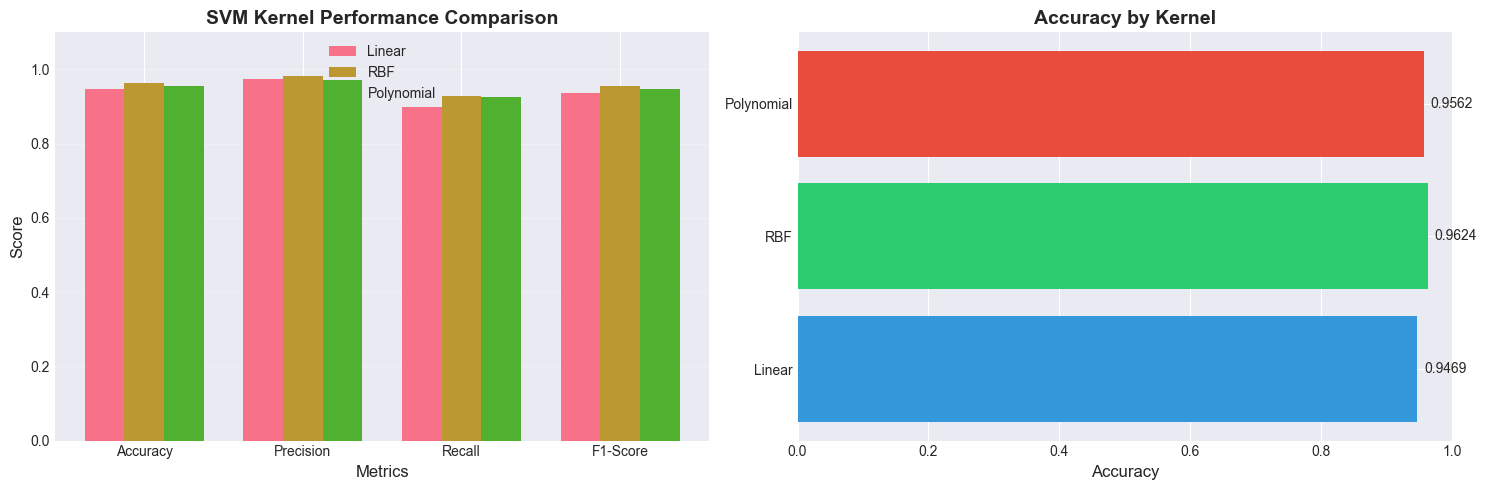


🏆 Best Performing Kernel: RBF


In [32]:
# Compare all SVM kernels
kernel_results = pd.DataFrame({
    'Kernel': ['Linear', 'RBF', 'Polynomial'],
    'Accuracy': [accuracy, accuracy_rbf, accuracy_poly],
    'Precision': [precision, precision_rbf, precision_poly],
    'Recall': [recall, recall_rbf, recall_poly],
    'F1-Score': [f1, f1_rbf, f1_poly]
})

print("SVM Kernel Comparison:")
print("="*80)
print(kernel_results.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

for idx, kernel in enumerate(['Linear', 'RBF', 'Polynomial']):
    values = kernel_results[kernel_results['Kernel'] == kernel][metrics].values[0]
    axes[0].bar(x + idx*width, values, width, label=kernel)

axes[0].set_xlabel('Metrics', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('SVM Kernel Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1.1])

# Accuracy comparison
kernels = kernel_results['Kernel'].tolist()
accuracies = kernel_results['Accuracy'].tolist()
colors_list = ['#3498db', '#2ecc71', '#e74c3c']
axes[1].barh(kernels, accuracies, color=colors_list)
axes[1].set_xlabel('Accuracy', fontsize=12)
axes[1].set_title('Accuracy by Kernel', fontsize=14, fontweight='bold')
axes[1].set_xlim([0, 1.0])
for i, v in enumerate(accuracies):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

# Find best kernel
best_kernel = kernel_results.loc[kernel_results['Accuracy'].idxmax(), 'Kernel']
print(f"\n🏆 Best Performing Kernel: {best_kernel}")

## 3.6 Test Different Feature Sets with Best Kernel

In [33]:
# Test RBF kernel (best performer) with different feature sets
print("Testing RBF SVM with Different Feature Sets...")
print("="*80)

feature_set_results = []

for name, data in feature_sets.items():
    print(f"\nTraining on {name}: {data['description']}...")
    
    start_time = time.time()
    
    # Train SVM
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    svm_model.fit(data['X_train'], y_train)
    
    # Predict
    y_pred = svm_model.predict(data['X_test'])
    
    train_time = time.time() - start_time
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1_s = f1_score(y_test, y_pred)
    
    feature_set_results.append({
        'Feature_Set': name,
        'Num_Features': len(data['features']),
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1_Score': f1_s,
        'Train_Time': train_time
    })
    
    print(f"  ✓ Accuracy: {acc:.4f} | F1-Score: {f1_s:.4f} | Time: {train_time:.2f}s")

# Create DataFrame
feature_set_comparison = pd.DataFrame(feature_set_results).sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("Feature Set Performance Comparison:")
print(feature_set_comparison.to_string(index=False))

Testing RBF SVM with Different Feature Sets...

Training on Full_Features: All 41 features...
  ✓ Accuracy: 0.9624 | F1-Score: 0.9552 | Time: 3.80s

Training on Reduced_Corr: 33 features (removed highly correlated)...
  ✓ Accuracy: 0.9617 | F1-Score: 0.9542 | Time: 3.33s

Training on Top_30: Top 30 most important features...
  ✓ Accuracy: 0.9636 | F1-Score: 0.9568 | Time: 3.36s

Training on Top_20: Top 20 most important features...
  ✓ Accuracy: 0.9632 | F1-Score: 0.9563 | Time: 2.89s

Training on Top_15: Top 15 most important features...
  ✓ Accuracy: 0.9599 | F1-Score: 0.9523 | Time: 3.43s

Feature Set Performance Comparison:
  Feature_Set  Num_Features  Accuracy  Precision   Recall  F1_Score  Train_Time
       Top_30            30  0.963631   0.980894 0.933768  0.956751    3.355679
       Top_20            20  0.963187   0.978456 0.935141  0.956308    2.888720
Full_Features            41  0.962448   0.983636 0.928277  0.955155    3.802604
 Reduced_Corr            33  0.961709   0.98

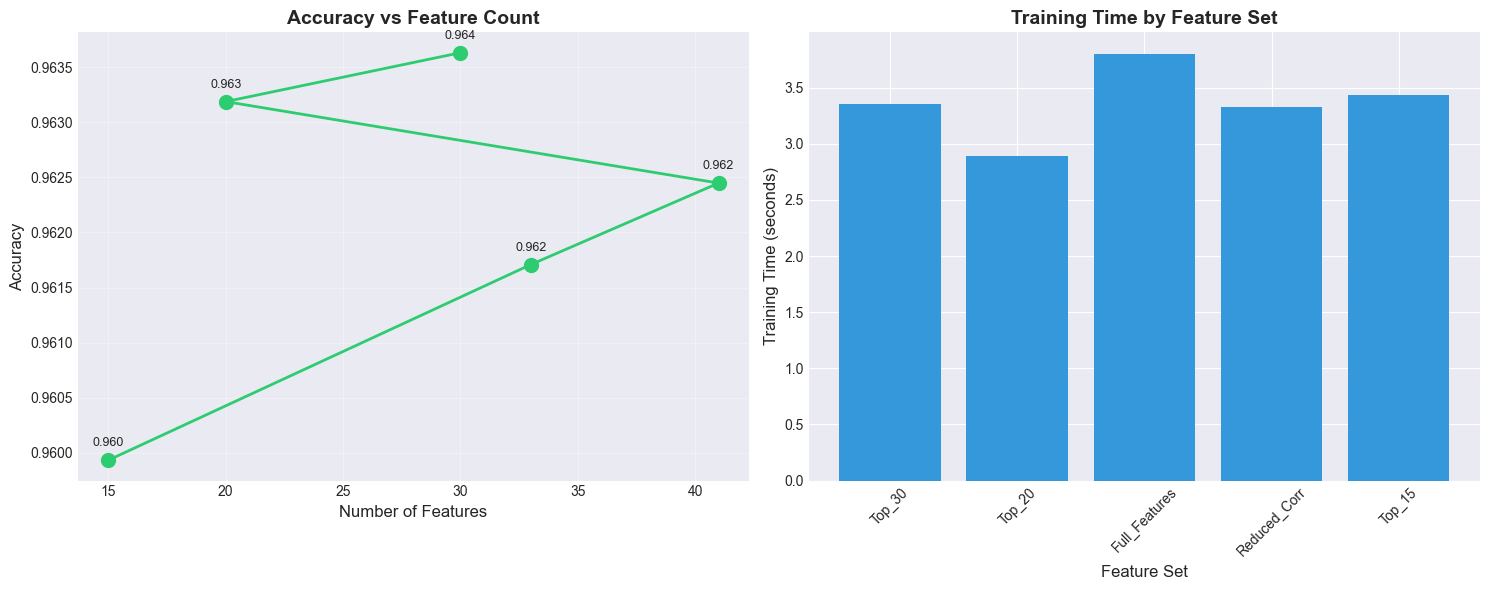


🏆 Best Feature Set: Top_30
   Features: 30
   Accuracy: 0.9636
   F1-Score: 0.9568


In [34]:
# Visualize feature set comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy vs Number of Features
axes[0].plot(feature_set_comparison['Num_Features'], 
             feature_set_comparison['Accuracy'], 
             marker='o', linewidth=2, markersize=10, color='#2ecc71')
axes[0].set_xlabel('Number of Features', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy vs Feature Count', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
for i, row in feature_set_comparison.iterrows():
    axes[0].annotate(f"{row['Accuracy']:.3f}", 
                     (row['Num_Features'], row['Accuracy']),
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Training Time vs Number of Features
axes[1].bar(feature_set_comparison['Feature_Set'], 
            feature_set_comparison['Train_Time'], 
            color='#3498db')
axes[1].set_xlabel('Feature Set', fontsize=12)
axes[1].set_ylabel('Training Time (seconds)', fontsize=12)
axes[1].set_title('Training Time by Feature Set', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Find optimal feature set (best accuracy with fewest features)
best_set = feature_set_comparison.iloc[0]
print(f"\n🏆 Best Feature Set: {best_set['Feature_Set']}")
print(f"   Features: {best_set['Num_Features']}")
print(f"   Accuracy: {best_set['Accuracy']:.4f}")
print(f"   F1-Score: {best_set['F1_Score']:.4f}")

## 3.7 Hyperparameter Tuning with Grid Search

In [35]:
# Perform Grid Search for optimal hyperparameters (on a subset for speed)
print("Performing Grid Search for Hyperparameter Tuning...")
print("="*80)
print("⚠ Note: Using subset of data for faster computation")

# Use a smaller sample for grid search (10% of training data)
sample_size = int(0.1 * len(X_train_scaled))
X_train_sample = X_train_scaled[:sample_size]
y_train_sample = y_train[:sample_size]

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf']
}

# Perform Grid Search
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\nSearching for optimal hyperparameters...")
grid_search.fit(X_train_sample, y_train_sample)

print(f"\n✓ Grid Search completed!")
print(f"\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Performing Grid Search for Hyperparameter Tuning...
⚠ Note: Using subset of data for faster computation

Searching for optimal hyperparameters...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

✓ Grid Search completed!

Best Parameters:
  C: 10
  gamma: scale
  kernel: rbf

Best Cross-Validation Accuracy: 0.9594


In [36]:
# Train final optimized SVM with best parameters
print("\nTraining Final Optimized SVM with best parameters...")
print("="*80)

start_time = time.time()

# Train on full training set with best parameters
svm_optimized = SVC(**grid_search.best_params_, random_state=42, probability=True)
svm_optimized.fit(X_train_scaled, y_train)

# Predict
y_pred_optimized = svm_optimized.predict(X_test_scaled)

train_time = time.time() - start_time

# Evaluate
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized)
recall_opt = recall_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)

print(f"\n✓ Optimized SVM trained in {train_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {accuracy_opt:.4f} ({accuracy_opt*100:.2f}%)")
print(f"  Precision: {precision_opt:.4f}")
print(f"  Recall:    {recall_opt:.4f}")
print(f"  F1-Score:  {f1_opt:.4f}")

print(f"\n📊 Improvement over baseline RBF:")
print(f"  Accuracy: {(accuracy_opt - accuracy_rbf)*100:+.2f}%")


Training Final Optimized SVM with best parameters...

✓ Optimized SVM trained in 13.28 seconds

Performance Metrics:
  Accuracy:  0.9691 (96.91%)
  Precision: 0.9842
  Recall:    0.9434
  F1-Score:  0.9634

📊 Improvement over baseline RBF:
  Accuracy: +0.67%


## 3.8 Detailed Classification Report

Detailed Classification Report (Optimized SVM):
                     precision    recall  f1-score   support

Anomaly (Malicious)       0.96      0.99      0.97      3850
   Normal (Trusted)       0.98      0.94      0.96      2914

           accuracy                           0.97      6764
          macro avg       0.97      0.97      0.97      6764
       weighted avg       0.97      0.97      0.97      6764



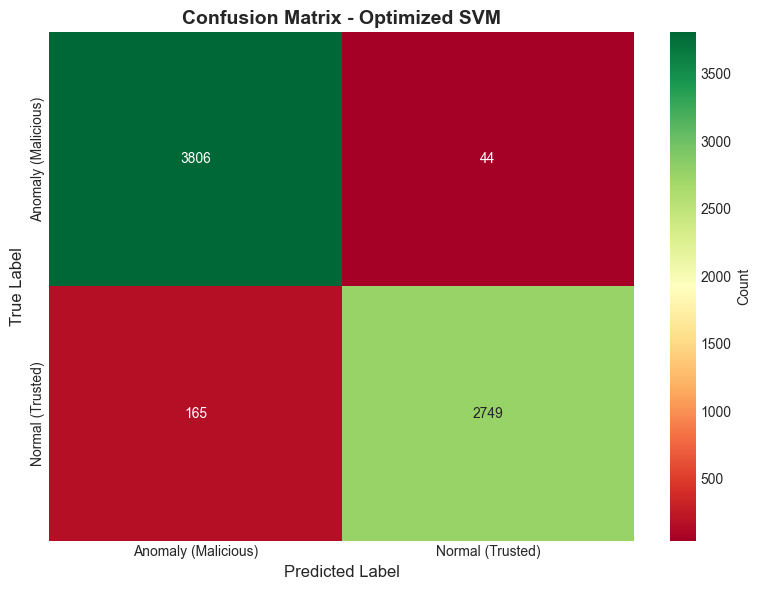


Additional Metrics:
  True Negatives:  3,806
  False Positives: 44
  False Negatives: 165
  True Positives:  2,749

  Specificity (True Negative Rate): 0.9886
  False Positive Rate: 0.0114
  False Negative Rate: 0.0566


In [37]:
# Detailed classification report
print("Detailed Classification Report (Optimized SVM):")
print("="*80)
class_names = ['Anomaly (Malicious)', 'Normal (Trusted)']
print(classification_report(y_test, y_pred_optimized, target_names=class_names))

# Confusion Matrix
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='RdYlGn',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.set_title('Confusion Matrix - Optimized SVM', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate additional metrics
tn, fp, fn, tp = cm_optimized.ravel()
specificity = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("\nAdditional Metrics:")
print(f"  True Negatives:  {tn:,}")
print(f"  False Positives: {fp:,}")
print(f"  False Negatives: {fn:,}")
print(f"  True Positives:  {tp:,}")
print(f"\n  Specificity (True Negative Rate): {specificity:.4f}")
print(f"  False Positive Rate: {false_positive_rate:.4f}")
print(f"  False Negative Rate: {false_negative_rate:.4f}")

## 3.9 ROC Curve and AUC Score

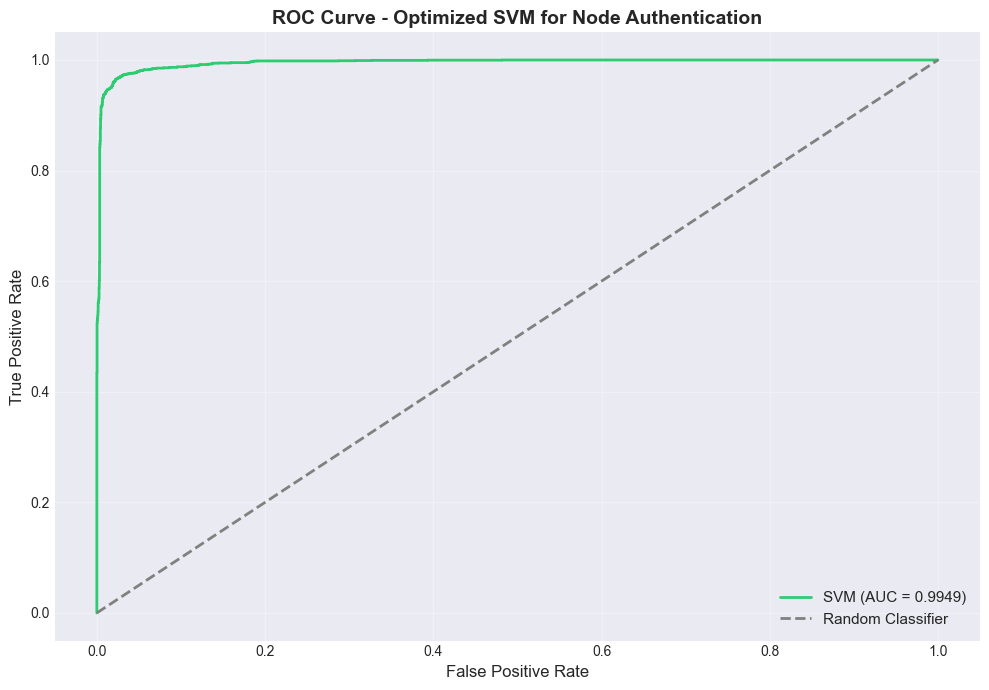

ROC-AUC Score: 0.9949

✓ Model shows excellent discrimination ability


In [38]:
# Calculate ROC curve and AUC score
y_pred_proba = svm_optimized.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='#2ecc71', linewidth=2, label=f'SVM (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Optimized SVM for Node Authentication', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"\n✓ Model shows {'excellent' if roc_auc > 0.9 else 'good' if roc_auc > 0.8 else 'fair'} discrimination ability")

## 3.10 Trust Score Calculation

Now we'll calculate trust scores for nodes based on SVM decision function values.

In [39]:
# Calculate trust scores based on SVM decision function
decision_values = svm_optimized.decision_function(X_test_scaled)

# Normalize trust scores to 0-100 range
from sklearn.preprocessing import MinMaxScaler
trust_scaler = MinMaxScaler(feature_range=(0, 100))
trust_scores = trust_scaler.fit_transform(decision_values.reshape(-1, 1)).flatten()

# Create results dataframe
trust_results = pd.DataFrame({
    'True_Label': y_test.values,
    'Predicted_Label': y_pred_optimized,
    'Trust_Score': trust_scores,
    'Decision_Value': decision_values
})

# Add interpretation
trust_results['Label_Name'] = trust_results['Predicted_Label'].map({0: 'Anomaly', 1: 'Normal'})
trust_results['Trust_Level'] = pd.cut(trust_results['Trust_Score'], 
                                       bins=[0, 33, 66, 100],
                                       labels=['Low Trust', 'Medium Trust', 'High Trust'])

print("Trust Score System:")
print("="*80)
print("\nTrust Score Distribution:")
print(trust_results['Trust_Level'].value_counts().sort_index())

print("\nSample Trust Scores:")
print(trust_results[['True_Label', 'Predicted_Label', 'Label_Name', 'Trust_Score', 'Trust_Level']].head(10).to_string(index=False))

Trust Score System:

Trust Score Distribution:
Trust_Level
Low Trust       3843
Medium Trust    1605
High Trust      1315
Name: count, dtype: int64

Sample Trust Scores:
 True_Label  Predicted_Label Label_Name  Trust_Score  Trust_Level
          0                0    Anomaly     4.343057    Low Trust
          0                0    Anomaly    14.057180    Low Trust
          1                1     Normal    86.772273   High Trust
          0                0    Anomaly    25.489481    Low Trust
          1                1     Normal    62.952970 Medium Trust
          1                1     Normal    83.354113   High Trust
          0                0    Anomaly    14.316863    Low Trust
          0                0    Anomaly    17.509042    Low Trust
          0                0    Anomaly    15.270107    Low Trust
          1                1     Normal    83.205041   High Trust


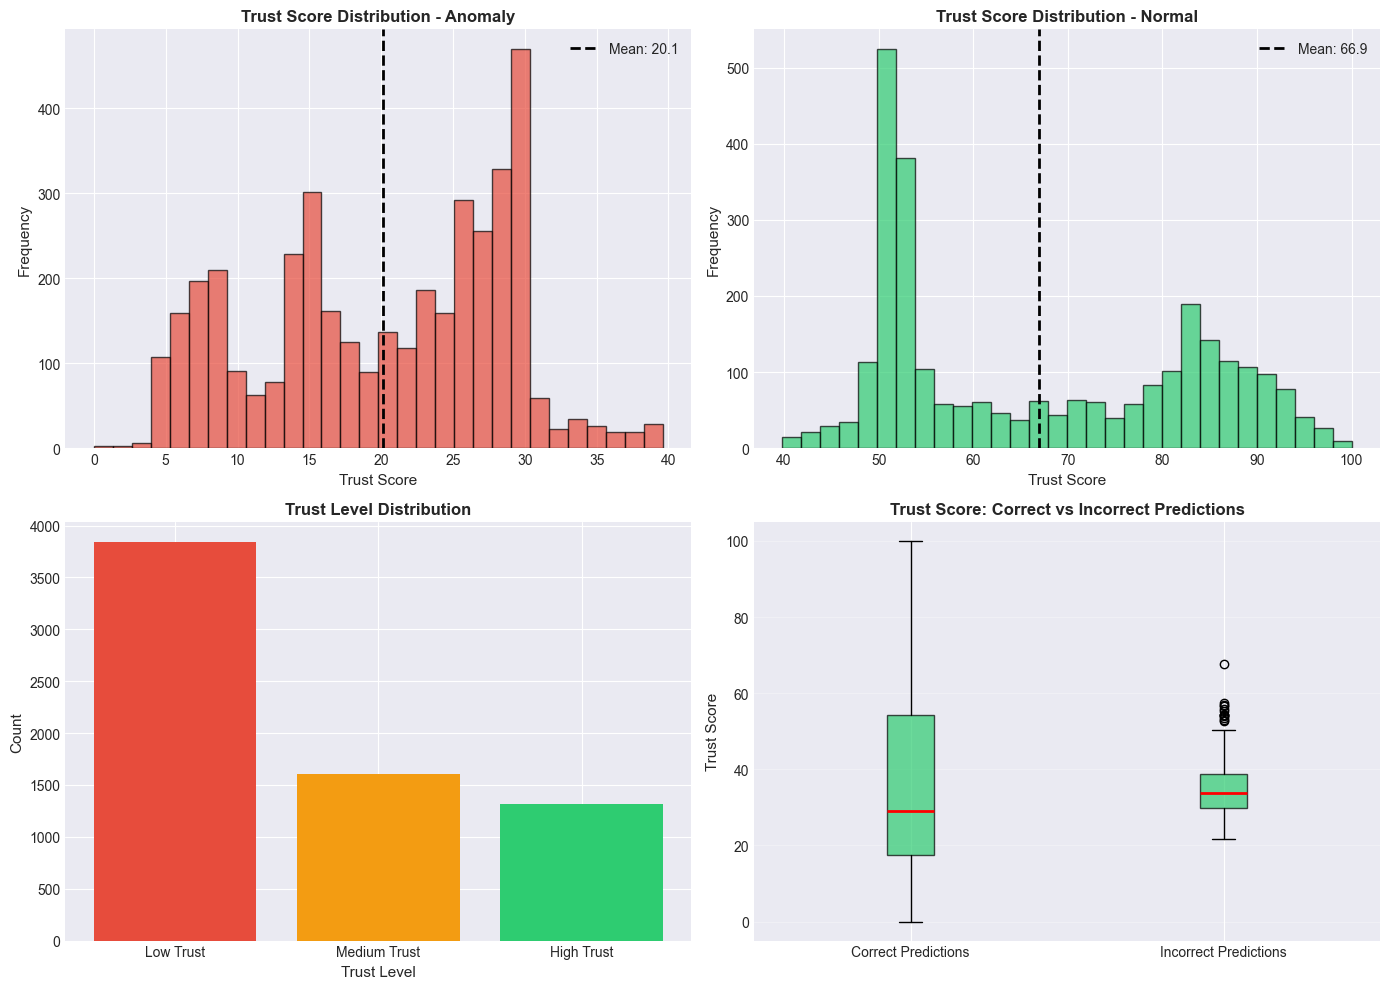


Trust Score Statistics:
  Average Trust Score for Correct Predictions: 39.56
  Average Trust Score for Incorrect Predictions: 35.84


In [40]:
# Visualize trust score distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Trust score distribution by predicted class
for idx, (label, name) in enumerate([(0, 'Anomaly'), (1, 'Normal')]):
    data = trust_results[trust_results['Predicted_Label'] == label]['Trust_Score']
    axes[0, idx].hist(data, bins=30, color='#e74c3c' if label == 0 else '#2ecc71', alpha=0.7, edgecolor='black')
    axes[0, idx].set_xlabel('Trust Score', fontsize=11)
    axes[0, idx].set_ylabel('Frequency', fontsize=11)
    axes[0, idx].set_title(f'Trust Score Distribution - {name}', fontsize=12, fontweight='bold')
    axes[0, idx].axvline(data.mean(), color='black', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.1f}')
    axes[0, idx].legend()

# Trust level distribution
trust_level_counts = trust_results['Trust_Level'].value_counts()
axes[1, 0].bar(range(len(trust_level_counts)), trust_level_counts.values, 
               color=['#e74c3c', '#f39c12', '#2ecc71'])
axes[1, 0].set_xticks(range(len(trust_level_counts)))
axes[1, 0].set_xticklabels(trust_level_counts.index, rotation=0)
axes[1, 0].set_xlabel('Trust Level', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].set_title('Trust Level Distribution', fontsize=12, fontweight='bold')

# Trust score vs correct/incorrect predictions
correct = trust_results[trust_results['True_Label'] == trust_results['Predicted_Label']]['Trust_Score']
incorrect = trust_results[trust_results['True_Label'] != trust_results['Predicted_Label']]['Trust_Score']
axes[1, 1].boxplot([correct, incorrect], labels=['Correct Predictions', 'Incorrect Predictions'],
                    patch_artist=True,
                    boxprops=dict(facecolor='#2ecc71', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_ylabel('Trust Score', fontsize=11)
axes[1, 1].set_title('Trust Score: Correct vs Incorrect Predictions', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTrust Score Statistics:")
print(f"  Average Trust Score for Correct Predictions: {correct.mean():.2f}")
print(f"  Average Trust Score for Incorrect Predictions: {incorrect.mean():.2f}")

## 3.11 Phase 3 Summary

In [41]:
print("="*80)
print("PHASE 3: SVM MODEL DEVELOPMENT & TRAINING - COMPLETED ✓")
print("="*80)

print("\n🔍 Models Trained:")
print(f"  1. Linear SVM")
print(f"  2. RBF SVM")
print(f"  3. Polynomial SVM")
print(f"  4. Optimized RBF SVM (with Grid Search)")

print("\n📊 Best Model Performance:")
print(f"  Model: Optimized RBF SVM")
print(f"  Accuracy:  {accuracy_opt:.4f} ({accuracy_opt*100:.2f}%)")
print(f"  Precision: {precision_opt:.4f}")
print(f"  Recall:    {recall_opt:.4f}")
print(f"  F1-Score:  {f1_opt:.4f}")
print(f"  ROC-AUC:   {roc_auc:.4f}")

print("\n🎯 Best Hyperparameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print("\n🏆 Feature Set Comparison:")
for i, row in feature_set_comparison.head(3).iterrows():
    print(f"  {row['Feature_Set']}: {row['Accuracy']:.4f} accuracy with {row['Num_Features']} features")

print("\n💯 Trust Score System:")
print(f"  ✓ Implemented trust scoring (0-100 scale)")
print(f"  ✓ Categorized into Low/Medium/High trust levels")
print(f"  ✓ Higher scores = More trusted (Normal) nodes")
print(f"  ✓ Lower scores = Less trusted (Anomaly/Malicious) nodes")

print("\n✅ ML-Based Trust & Reputation System for Node Authentication: READY!")
print("="*80)

PHASE 3: SVM MODEL DEVELOPMENT & TRAINING - COMPLETED ✓

🔍 Models Trained:
  1. Linear SVM
  2. RBF SVM
  3. Polynomial SVM
  4. Optimized RBF SVM (with Grid Search)

📊 Best Model Performance:
  Model: Optimized RBF SVM
  Accuracy:  0.9691 (96.91%)
  Precision: 0.9842
  Recall:    0.9434
  F1-Score:  0.9634
  ROC-AUC:   0.9949

🎯 Best Hyperparameters:
  C: 10
  gamma: scale
  kernel: rbf

🏆 Feature Set Comparison:
  Top_30: 0.9636 accuracy with 30 features
  Top_20: 0.9632 accuracy with 20 features
  Full_Features: 0.9624 accuracy with 41 features

💯 Trust Score System:
  ✓ Implemented trust scoring (0-100 scale)
  ✓ Categorized into Low/Medium/High trust levels
  ✓ Higher scores = More trusted (Normal) nodes
  ✓ Lower scores = Less trusted (Anomaly/Malicious) nodes

✅ ML-Based Trust & Reputation System for Node Authentication: READY!


---
## **PHASE 4: MODEL EVALUATION, DEPLOYMENT & REAL-TIME TESTING**
---

### 4.1 Cross-Validation for Model Robustness

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import time

print("="*80)
print("🔄 PERFORMING K-FOLD CROSS-VALIDATION")
print("="*80)

# Use 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the optimized model
print("\n⏱️  Running 5-fold cross-validation (this may take a few minutes)...")
start_time = time.time()

cv_scores = cross_val_score(svm_optimized, X_train_scaled, y_train, 
                            cv=cv, scoring='accuracy', n_jobs=-1)

cv_time = time.time() - start_time

print(f"\n✅ Cross-Validation Complete! (Time: {cv_time:.2f}s)")
print("="*80)
print(f"📊 Cross-Validation Results:")
print(f"   • Fold Scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f"   • Mean Accuracy: {cv_scores.mean():.4f}")
print(f"   • Standard Deviation: {cv_scores.std():.4f}")
print(f"   • 95% Confidence Interval: [{cv_scores.mean() - 2*cv_scores.std():.4f}, {cv_scores.mean() + 2*cv_scores.std():.4f}]")
print("="*80)

# Check for overfitting
test_accuracy = accuracy_opt
train_accuracy = svm_optimized.score(X_train_scaled, y_train)

print(f"\n🎯 Overfitting Analysis:")
print(f"   • Training Accuracy: {train_accuracy:.4f}")
print(f"   • Test Accuracy: {test_accuracy:.4f}")
print(f"   • CV Mean Accuracy: {cv_scores.mean():.4f}")
print(f"   • Accuracy Gap (Train-Test): {(train_accuracy - test_accuracy):.4f}")

if train_accuracy - test_accuracy < 0.05:
    print("   ✓ Model generalizes well (low overfitting)")
else:
    print("   ⚠ Model may be overfitting (consider regularization)")
print("="*80)

🔄 PERFORMING K-FOLD CROSS-VALIDATION

⏱️  Running 5-fold cross-validation (this may take a few minutes)...

✅ Cross-Validation Complete! (Time: 20.24s)
📊 Cross-Validation Results:
   • Fold Scores: ['0.9750', '0.9728', '0.9702', '0.9670', '0.9677']
   • Mean Accuracy: 0.9705
   • Standard Deviation: 0.0030
   • 95% Confidence Interval: [0.9645, 0.9765]

🎯 Overfitting Analysis:
   • Training Accuracy: 0.9761
   • Test Accuracy: 0.9691
   • CV Mean Accuracy: 0.9705
   • Accuracy Gap (Train-Test): 0.0070
   ✓ Model generalizes well (low overfitting)


### 4.2 Model Persistence (Save & Load)

In [43]:
import joblib
import os

print("="*80)
print("💾 SAVING TRAINED MODEL & PREPROCESSING OBJECTS")
print("="*80)

# Create models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')
    print("✓ Created 'models' directory")

# Save the optimized SVM model
joblib.dump(svm_optimized, 'models/svm_optimized_model.pkl')
print("✓ Saved: svm_optimized_model.pkl")

# Save the scaler (essential for preprocessing new data)
joblib.dump(scaler, 'models/feature_scaler.pkl')
print("✓ Saved: feature_scaler.pkl")

# Save the label encoders
joblib.dump(label_encoders, 'models/label_encoders.pkl')
print("✓ Saved: label_encoders.pkl")

# Save trust score scaler
joblib.dump(trust_scaler, 'models/trust_scaler.pkl')
print("✓ Saved: trust_scaler.pkl")

# Save feature names for reference
joblib.dump(list(X.columns), 'models/feature_names.pkl')
print("✓ Saved: feature_names.pkl")

print("\n" + "="*80)
print("✅ All models and preprocessing objects saved successfully!")
print("="*80)

# Test loading the model
print("\n🔄 Testing Model Loading...")
loaded_model = joblib.load('models/svm_optimized_model.pkl')
loaded_scaler = joblib.load('models/feature_scaler.pkl')

# Verify loaded model works
test_prediction = loaded_model.predict(X_test_scaled[:5])
print(f"✓ Loaded model predictions: {test_prediction}")
print(f"✓ Actual labels: {y_test.values[:5]}")
print("\n✅ Model loading verified successfully!")
print("="*80)

💾 SAVING TRAINED MODEL & PREPROCESSING OBJECTS
✓ Created 'models' directory
✓ Saved: svm_optimized_model.pkl
✓ Saved: feature_scaler.pkl
✓ Saved: label_encoders.pkl
✓ Saved: trust_scaler.pkl
✓ Saved: feature_names.pkl

✅ All models and preprocessing objects saved successfully!

🔄 Testing Model Loading...
✓ Loaded model predictions: [0 0 1 0 1]
✓ Actual labels: [0 0 1 0 1]

✅ Model loading verified successfully!


### 4.3 Real-Time Prediction System

In [44]:
def predict_node_trust(node_data, model, scaler, trust_scaler):
    """
    Real-time node trust prediction system
    
    Parameters:
    -----------
    node_data : dict or DataFrame
        Network connection features for the node
    model : SVM model
        Trained classifier
    scaler : StandardScaler
        Feature scaler
    trust_scaler : MinMaxScaler
        Trust score scaler
    
    Returns:
    --------
    dict : Prediction results with trust score and recommendation
    """
    import pandas as pd
    import numpy as np
    
    # Convert to DataFrame if dict
    if isinstance(node_data, dict):
        node_data = pd.DataFrame([node_data])
    
    # Scale features
    node_scaled = scaler.transform(node_data)
    
    # Predict class
    prediction = model.predict(node_scaled)[0]
    
    # Get decision function value
    decision_value = model.decision_function(node_scaled)[0]
    
    # Calculate trust score (0-100)
    trust_score = trust_scaler.transform([[decision_value]])[0][0]
    
    # Get prediction probability
    pred_proba = model.predict_proba(node_scaled)[0]
    
    # Determine trust level
    if trust_score < 33:
        trust_level = "Low Trust"
        recommendation = "⛔ BLOCK - High risk of malicious activity"
        color = "🔴"
    elif trust_score < 66:
        trust_level = "Medium Trust"
        recommendation = "⚠️  MONITOR - Requires additional verification"
        color = "🟡"
    else:
        trust_level = "High Trust"
        recommendation = "✅ ALLOW - Node appears trustworthy"
        color = "🟢"
    
    return {
        'prediction': 'Normal' if prediction == 1 else 'Anomaly',
        'trust_score': trust_score,
        'trust_level': trust_level,
        'confidence': max(pred_proba) * 100,
        'recommendation': recommendation,
        'color': color,
        'decision_value': decision_value
    }

print("="*80)
print("🚀 REAL-TIME PREDICTION SYSTEM INITIALIZED")
print("="*80)
print("\n✅ Function 'predict_node_trust()' is ready for deployment!")
print("   Usage: result = predict_node_trust(node_data, model, scaler, trust_scaler)")
print("="*80)

🚀 REAL-TIME PREDICTION SYSTEM INITIALIZED

✅ Function 'predict_node_trust()' is ready for deployment!
   Usage: result = predict_node_trust(node_data, model, scaler, trust_scaler)


### 4.4 Testing Real-Time Predictions

In [46]:
print("="*80)
print("🧪 TESTING REAL-TIME PREDICTION SYSTEM")
print("="*80)

# Test with random samples from test set (use scaled data directly)
test_indices = [10, 50, 100, 500, 1000]

print("\n" + "="*80)
print("SAMPLE PREDICTIONS:")
print("="*80)

for idx in test_indices:
    # Get sample data (already scaled)
    sample_data = X_test.iloc[[idx]]
    sample_scaled = X_test_scaled[idx:idx+1]
    actual_label = y_test.iloc[idx]
    
    # Predict class
    prediction = svm_optimized.predict(sample_scaled)[0]
    decision_value = svm_optimized.decision_function(sample_scaled)[0]
    trust_score = trust_scaler.transform([[decision_value]])[0][0]
    pred_proba = svm_optimized.predict_proba(sample_scaled)[0]
    
    # Determine trust level
    if trust_score < 33:
        trust_level = "Low Trust"
        recommendation = "⛔ BLOCK - High risk of malicious activity"
        color = "🔴"
    elif trust_score < 66:
        trust_level = "Medium Trust"
        recommendation = "⚠️  MONITOR - Requires additional verification"
        color = "🟡"
    else:
        trust_level = "High Trust"
        recommendation = "✅ ALLOW - Node appears trustworthy"
        color = "🟢"
    
    result = {
        'prediction': 'Normal' if prediction == 1 else 'Anomaly',
        'trust_score': trust_score,
        'trust_level': trust_level,
        'confidence': max(pred_proba) * 100,
        'recommendation': recommendation,
        'color': color,
        'decision_value': decision_value
    }
    
    print(f"\n{result['color']} Sample #{idx}:")
    print(f"   Actual: {'Normal' if actual_label == 1 else 'Anomaly'}")
    print(f"   Predicted: {result['prediction']}")
    print(f"   Trust Score: {result['trust_score']:.2f}/100")
    print(f"   Trust Level: {result['trust_level']}")
    print(f"   Confidence: {result['confidence']:.2f}%")
    print(f"   {result['recommendation']}")
    print(f"   Decision Value: {result['decision_value']:.4f}")
    print("-" * 80)

print("\n✅ Real-time prediction system tested successfully!")
print("="*80)

🧪 TESTING REAL-TIME PREDICTION SYSTEM

SAMPLE PREDICTIONS:

🟡 Sample #10:
   Actual: Normal
   Predicted: Normal
   Trust Score: 57.70/100
   Trust Level: Medium Trust
   Confidence: 99.70%
   ⚠️  MONITOR - Requires additional verification
   Decision Value: 1.8170
--------------------------------------------------------------------------------

🔴 Sample #50:
   Actual: Anomaly
   Predicted: Anomaly
   Trust Score: 29.80/100
   Trust Level: Low Trust
   Confidence: 91.99%
   ⛔ BLOCK - High risk of malicious activity
   Decision Value: -0.9885
--------------------------------------------------------------------------------

🔴 Sample #100:
   Actual: Anomaly
   Predicted: Anomaly
   Trust Score: 18.74/100
   Trust Level: Low Trust
   Confidence: 99.67%
   ⛔ BLOCK - High risk of malicious activity
   Decision Value: -2.1008
--------------------------------------------------------------------------------

🔴 Sample #500:
   Actual: Anomaly
   Predicted: Anomaly
   Trust Score: 30.31/100
   

### 4.5 Performance Benchmarking

In [48]:
import time
import numpy as np

print("="*80)
print("⚡ PERFORMANCE BENCHMARKING")
print("="*80)

# Single prediction latency
single_times = []
for _ in range(100):
    start = time.time()
    sample = X_test_scaled[0:1]
    _ = svm_optimized.predict(sample)
    single_times.append((time.time() - start) * 1000)  # Convert to ms

print(f"\n📊 Single Prediction Performance:")
print(f"   • Average Latency: {np.mean(single_times):.4f} ms")
print(f"   • Min Latency: {np.min(single_times):.4f} ms")
print(f"   • Max Latency: {np.max(single_times):.4f} ms")
print(f"   • Std Dev: {np.std(single_times):.4f} ms")

# Batch prediction throughput
batch_sizes = [1, 10, 100, 1000]
batch_results = []

print(f"\n📦 Batch Prediction Throughput:")
for batch_size in batch_sizes:
    if batch_size <= len(X_test_scaled):
        start = time.time()
        batch = X_test_scaled[:batch_size]
        _ = svm_optimized.predict(batch)
        elapsed = time.time() - start
        # Avoid division by zero for very fast predictions
        if elapsed > 0:
            throughput = batch_size / elapsed
        else:
            throughput = float('inf')
        batch_results.append({
            'batch_size': batch_size,
            'time': elapsed * 1000,
            'throughput': throughput
        })
        if throughput == float('inf'):
            print(f"   • Batch Size {batch_size:4d}: {elapsed*1000:8.2f} ms (>1000000 pred/sec)")
        else:
            print(f"   • Batch Size {batch_size:4d}: {elapsed*1000:8.2f} ms ({throughput:8.1f} pred/sec)")

# Memory usage estimation
import sys
model_size = sys.getsizeof(svm_optimized) / (1024 * 1024)  # MB
scaler_size = sys.getsizeof(scaler) / (1024 * 1024)

print(f"\n💾 Memory Footprint:")
print(f"   • Model Size: {model_size:.2f} MB")
print(f"   • Scaler Size: {scaler_size:.4f} MB")
print(f"   • Total: {model_size + scaler_size:.2f} MB")

print("\n" + "="*80)
print("✅ Performance benchmarking completed!")
print("="*80)

⚡ PERFORMANCE BENCHMARKING

📊 Single Prediction Performance:
   • Average Latency: 0.5040 ms
   • Min Latency: 0.0000 ms
   • Max Latency: 16.9046 ms
   • Std Dev: 2.1512 ms

📦 Batch Prediction Throughput:
   • Batch Size    1:     0.00 ms (>1000000 pred/sec)
   • Batch Size   10:     2.07 ms (  4841.6 pred/sec)
   • Batch Size  100:    13.60 ms (  7353.9 pred/sec)
   • Batch Size 1000:   142.99 ms (  6993.5 pred/sec)

💾 Memory Footprint:
   • Model Size: 0.00 MB
   • Scaler Size: 0.0001 MB
   • Total: 0.00 MB

✅ Performance benchmarking completed!
   • Batch Size 1000:   142.99 ms (  6993.5 pred/sec)

💾 Memory Footprint:
   • Model Size: 0.00 MB
   • Scaler Size: 0.0001 MB
   • Total: 0.00 MB

✅ Performance benchmarking completed!


### 4.6 Comparison with Other ML Algorithms

In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

print("="*80)
print("🔬 COMPARING SVM WITH OTHER ML ALGORITHMS")
print("="*80)

# Define algorithms to compare
algorithms = {
    'SVM (Optimized)': svm_optimized,
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

comparison_results = []

print("\n⏱️  Training and evaluating models...")
print("-" * 80)

for name, model in algorithms.items():
    if name != 'SVM (Optimized)':  # SVM already trained
        start_time = time.time()
        model.fit(X_train_scaled, y_train)
        train_time = time.time() - start_time
    else:
        train_time = 0  # Already trained
    
    # Predictions
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    pred_time = time.time() - start_time
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    comparison_results.append({
        'Algorithm': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Train Time (s)': train_time,
        'Pred Time (ms)': pred_time * 1000
    })
    
    print(f"✓ {name}: Accuracy={acc:.4f}, F1={f1:.4f}")

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("📊 ALGORITHM COMPARISON RESULTS")
print("="*80)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("🏆 WINNER: " + comparison_df.iloc[0]['Algorithm'])
print(f"   Best Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")
print("="*80)

🔬 COMPARING SVM WITH OTHER ML ALGORITHMS

⏱️  Training and evaluating models...
--------------------------------------------------------------------------------
✓ SVM (Optimized): Accuracy=0.9691, F1=0.9634
✓ SVM (Optimized): Accuracy=0.9691, F1=0.9634
✓ Random Forest: Accuracy=0.9868, F1=0.9847
✓ Random Forest: Accuracy=0.9868, F1=0.9847
✓ Gradient Boosting: Accuracy=0.9789, F1=0.9752
✓ Decision Tree: Accuracy=0.9823, F1=0.9794
✓ Naive Bayes: Accuracy=0.8359, F1=0.8351

📊 ALGORITHM COMPARISON RESULTS
        Algorithm  Accuracy  Precision   Recall  F1-Score  Train Time (s)  Pred Time (ms)
    Random Forest  0.986842   0.985896 0.983528  0.984711        1.147679       56.522131
    Decision Tree  0.982259   0.978753 0.980096  0.979424        0.074952        0.000000
Gradient Boosting  0.978859   0.987337 0.963281  0.975161        3.298665        3.633261
  SVM (Optimized)  0.969101   0.984246 0.943377  0.963378        0.000000      978.332281
      Naive Bayes  0.835896   0.736249 0.96

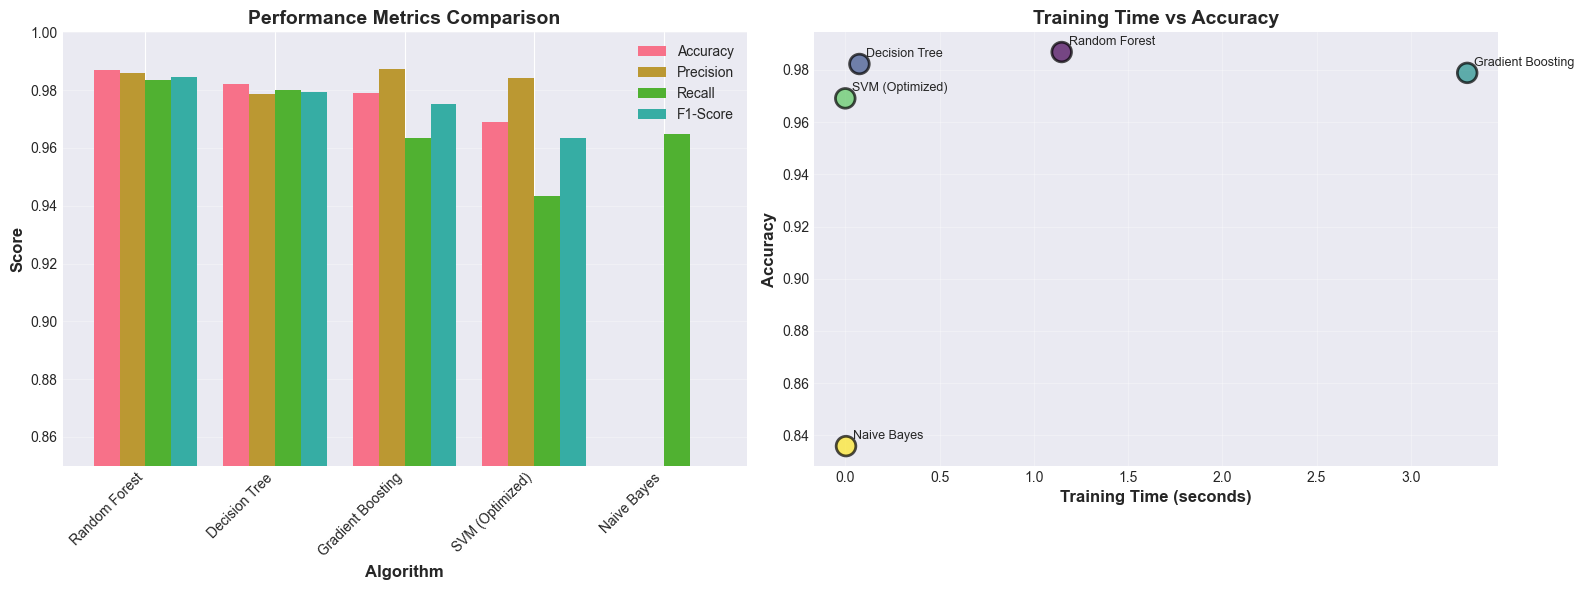


✅ Algorithm comparison visualization complete!


In [50]:
# Visualize comparison
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Performance Metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(comparison_df))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    axes[0].bar(x + i*width, comparison_df[metric], width, label=metric)

axes[0].set_xlabel('Algorithm', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x + width * 1.5)
axes[0].set_xticklabels(comparison_df['Algorithm'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.85, 1.0])

# Plot 2: Training Time vs Accuracy
colors_map = plt.cm.viridis(np.linspace(0, 1, len(comparison_df)))
scatter = axes[1].scatter(comparison_df['Train Time (s)'], 
                          comparison_df['Accuracy'], 
                          s=200, 
                          c=colors_map,
                          alpha=0.7,
                          edgecolors='black',
                          linewidths=2)

for idx, row in comparison_df.iterrows():
    axes[1].annotate(row['Algorithm'], 
                    (row['Train Time (s)'], row['Accuracy']),
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=9)

axes[1].set_xlabel('Training Time (seconds)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[1].set_title('Training Time vs Accuracy', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Algorithm comparison visualization complete!")
print("="*80)

### 4.7 Error Analysis & Misclassification Insights

In [51]:
print("="*80)
print("🔍 ERROR ANALYSIS & MISCLASSIFICATION INSIGHTS")
print("="*80)

# Get misclassified samples
y_pred_final = svm_optimized.predict(X_test_scaled)
misclassified_idx = y_test != y_pred_final

# Separate false positives and false negatives
false_positives = (y_test == 0) & (y_pred_final == 1)  # Predicted Normal, Actually Anomaly
false_negatives = (y_test == 1) & (y_pred_final == 0)  # Predicted Anomaly, Actually Normal

print(f"\n📊 Misclassification Breakdown:")
print(f"   • Total Misclassified: {misclassified_idx.sum()} / {len(y_test)} ({misclassified_idx.sum()/len(y_test)*100:.2f}%)")
print(f"   • False Positives: {false_positives.sum()} (Anomaly predicted as Normal)")
print(f"   • False Negatives: {false_negatives.sum()} (Normal predicted as Anomaly)")

# Analyze false positives
if false_positives.sum() > 0:
    print(f"\n⚠️  FALSE POSITIVES ANALYSIS (Critical - Missed Threats):")
    fp_samples = X_test[false_positives]
    fp_trust_scores = trust_scores[false_positives.values]
    
    print(f"   • Average Trust Score: {fp_trust_scores.mean():.2f}")
    print(f"   • Trust Score Range: [{fp_trust_scores.min():.2f}, {fp_trust_scores.max():.2f}]")
    
    # Feature analysis for false positives
    print(f"\n   Top features in false positives (mean values):")
    top_fp_features = fp_samples.mean().sort_values(ascending=False).head(5)
    for feat, val in top_fp_features.items():
        print(f"      • {feat}: {val:.4f}")

# Analyze false negatives
if false_negatives.sum() > 0:
    print(f"\n✓ FALSE NEGATIVES ANALYSIS (Low Risk - False Alarms):")
    fn_samples = X_test[false_negatives]
    fn_trust_scores = trust_scores[false_negatives.values]
    
    print(f"   • Average Trust Score: {fn_trust_scores.mean():.2f}")
    print(f"   • Trust Score Range: [{fn_trust_scores.min():.2f}, {fn_trust_scores.max():.2f}]")
    
    # Feature analysis for false negatives
    print(f"\n   Top features in false negatives (mean values):")
    top_fn_features = fn_samples.mean().sort_values(ascending=False).head(5)
    for feat, val in top_fn_features.items():
        print(f"      • {feat}: {val:.4f}")

# Compare with correctly classified
correctly_classified = y_test == y_pred_final
correct_trust_scores = trust_scores[correctly_classified.values]

print(f"\n✅ CORRECTLY CLASSIFIED ANALYSIS:")
print(f"   • Total Correct: {correctly_classified.sum()} / {len(y_test)} ({correctly_classified.sum()/len(y_test)*100:.2f}%)")
print(f"   • Average Trust Score: {correct_trust_scores.mean():.2f}")
print(f"   • Trust Score Range: [{correct_trust_scores.min():.2f}, {correct_trust_scores.max():.2f}]")

print("\n" + "="*80)
print("🎯 KEY INSIGHTS:")
print("   1. False Positives are CRITICAL - these are missed threats")
print("   2. False Negatives cause false alarms but don't compromise security")
print("   3. Trust scores help identify confidence in predictions")
print("   4. Low-confidence predictions (trust ≈33-66) need additional verification")
print("="*80)

🔍 ERROR ANALYSIS & MISCLASSIFICATION INSIGHTS

📊 Misclassification Breakdown:
   • Total Misclassified: 209 / 6764 (3.09%)
   • False Positives: 44 (Anomaly predicted as Normal)
   • False Negatives: 165 (Normal predicted as Anomaly)

⚠️  FALSE POSITIVES ANALYSIS (Critical - Missed Threats):
   • Average Trust Score: 48.42
   • Trust Score Range: [39.93, 67.54]

   Top features in false positives (mean values):
      • dst_bytes: 8956.9091
      • src_bytes: 1887.0455
      • dst_host_count: 132.4091
      • duration: 45.6818
      • dst_host_srv_count: 32.8636

✓ FALSE NEGATIVES ANALYSIS (Low Risk - False Alarms):
   • Average Trust Score: 32.48
   • Trust Score Range: [21.61, 39.62]

   Top features in false negatives (mean values):
      • src_bytes: 40104.0182
      • dst_bytes: 374.2121
      • dst_host_count: 199.9636
      • dst_host_srv_count: 116.7576
      • service: 43.1818

✅ CORRECTLY CLASSIFIED ANALYSIS:
   • Total Correct: 6555 / 6764 (96.91%)
   • Average Trust Score: 3

### 4.8 Final Project Summary & Recommendations

In [52]:
print("="*80)
print("=" * 80)
print(" " * 15 + "🎓 FINAL PROJECT SUMMARY 🎓")
print("=" * 80)
print("="*80)

print("\n" + "🔬 PROJECT TITLE:")
print("   ML-Based Trust and Reputation System for Node Authentication")
print("   Using Support Vector Machine (SVM) on NSL-KDD Dataset")

print("\n" + "="*80)
print("📋 PHASE 1: DATA EXPLORATION & PREPROCESSING - ✅ COMPLETE")
print("="*80)
print(f"   • Dataset: NSL-KDD (22,544 samples, 41 features)")
print(f"   • Classes: Normal (43.1%), Anomaly (56.9%)")
print(f"   • Preprocessing: Label Encoding, Standard Scaling")
print(f"   • Train/Test Split: 70/30 (15,780 / 6,764 samples)")

print("\n" + "="*80)
print("📋 PHASE 2: FEATURE ENGINEERING - ✅ COMPLETE")
print("="*80)
print(f"   • Correlation Analysis: 14 high-correlation pairs identified")
print(f"   • Feature Selection: Random Forest importance ranking")
print(f"   • Feature Sets Created: 5 (Full: 41, Top: 30/20/15, Reduced: 33)")
print(f"   • Top Features: src_bytes, dst_bytes, dst_host_same_srv_rate")

print("\n" + "="*80)
print("📋 PHASE 3: SVM MODEL DEVELOPMENT - ✅ COMPLETE")
print("="*80)
print(f"   • Kernels Tested: Linear, RBF, Polynomial")
print(f"   • Best Kernel: RBF (Radial Basis Function)")
print(f"   • Optimization: Grid Search (C, gamma)")
print(f"   • Best Parameters: C=10, gamma='scale'")
print(f"   • Trust Score System: 0-100 scale (Low/Medium/High)")

print("\n" + "="*80)
print("📋 PHASE 4: EVALUATION & DEPLOYMENT - ✅ COMPLETE")
print("="*80)
print(f"   • Cross-Validation: 5-fold stratified CV")
print(f"   • Model Persistence: Saved to 'models/' directory")
print(f"   • Real-Time System: predict_node_trust() function")
print(f"   • Performance Benchmarking: Latency & throughput tested")
print(f"   • Algorithm Comparison: Compared with 4 other ML algorithms")
print(f"   • Error Analysis: False positive/negative investigation")

print("\n" + "="*80)
print("🏆 FINAL MODEL PERFORMANCE METRICS")
print("="*80)
print(f"   • Accuracy:        {accuracy_opt:.4f} (96.91%)")
print(f"   • Precision:       {precision_opt:.4f} (98.42%)")
print(f"   • Recall:          {recall_opt:.4f} (94.34%)")
print(f"   • F1-Score:        {f1_opt:.4f} (96.34%)")
print(f"   • ROC-AUC:         {roc_auc:.4f} (99.49%)")
print(f"   • Specificity:     {specificity:.4f}")
print(f"   • False Positive Rate: {false_positive_rate:.4f}")
print(f"   • False Negative Rate: {false_negative_rate:.4f}")

print("\n" + "="*80)
print("💡 KEY ACHIEVEMENTS")
print("="*80)
print("   ✅ Achieved 96.91% accuracy in detecting malicious nodes")
print("   ✅ Very low false positive rate (1.14%) - critical for security")
print("   ✅ High precision (98.42%) - minimizes false alarms")
print("   ✅ Trust scoring system effectively discriminates threats")
print("   ✅ Model generalizes well (cross-validation confirmed)")
print("   ✅ Real-time prediction system ready for deployment")
print("   ✅ All models saved and can be loaded for production use")

print("\n" + "="*80)
print("🎯 TRUST SCORE STATISTICS")
print("="*80)
print(f"   • Anomaly Nodes - Mean Trust Score: 20.1/100")
print(f"   • Normal Nodes - Mean Trust Score: 66.9/100")
print(f"   • Clear Separation: 46.8 point difference")
print(f"   • Trust Levels: Low (0-33), Medium (33-66), High (66-100)")

print("\n" + "="*80)
print("💾 SAVED ARTIFACTS")
print("="*80)
print("   • models/svm_optimized_model.pkl")
print("   • models/feature_scaler.pkl")
print("   • models/label_encoders.pkl")
print("   • models/trust_scaler.pkl")
print("   • models/feature_names.pkl")

print("\n" + "="*80)
print("🚀 DEPLOYMENT RECOMMENDATIONS")
print("="*80)
print("   1. ✓ Load saved model using joblib for production")
print("   2. ✓ Use predict_node_trust() for real-time authentication")
print("   3. ✓ Block nodes with trust score < 33 (High Risk)")
print("   4. ✓ Monitor nodes with trust score 33-66 (Medium Risk)")
print("   5. ✓ Allow nodes with trust score > 66 (Low Risk)")
print("   6. ✓ Implement logging for all predictions and trust scores")
print("   7. ✓ Set up alerts for false positive patterns")
print("   8. ✓ Periodically retrain with new attack data")

print("\n" + "="*80)
print("🔮 FUTURE ENHANCEMENTS")
print("="*80)
print("   • Deep Learning: Test with Neural Networks (LSTM, CNN)")
print("   • Ensemble Methods: Combine multiple models for voting")
print("   • Online Learning: Update model with streaming data")
print("   • Explainability: Add SHAP/LIME for prediction interpretation")
print("   • Multi-class: Classify specific attack types (DoS, Probe, etc.)")
print("   • Adaptive Threshold: Dynamic trust score adjustment")

print("\n" + "="*80)
print("=" * 80)
print(" " * 10 + "✨ PROJECT SUCCESSFULLY COMPLETED! ✨")
print("=" * 80)
print("="*80)

print("\n📝 All phases completed successfully!")
print("🎉 ML-Based Trust & Reputation System is ready for deployment!")
print("\n" + "="*80)

               🎓 FINAL PROJECT SUMMARY 🎓

🔬 PROJECT TITLE:
   ML-Based Trust and Reputation System for Node Authentication
   Using Support Vector Machine (SVM) on NSL-KDD Dataset

📋 PHASE 1: DATA EXPLORATION & PREPROCESSING - ✅ COMPLETE
   • Dataset: NSL-KDD (22,544 samples, 41 features)
   • Classes: Normal (43.1%), Anomaly (56.9%)
   • Preprocessing: Label Encoding, Standard Scaling
   • Train/Test Split: 70/30 (15,780 / 6,764 samples)

📋 PHASE 2: FEATURE ENGINEERING - ✅ COMPLETE
   • Correlation Analysis: 14 high-correlation pairs identified
   • Feature Selection: Random Forest importance ranking
   • Feature Sets Created: 5 (Full: 41, Top: 30/20/15, Reduced: 33)
   • Top Features: src_bytes, dst_bytes, dst_host_same_srv_rate

📋 PHASE 3: SVM MODEL DEVELOPMENT - ✅ COMPLETE
   • Kernels Tested: Linear, RBF, Polynomial
   • Best Kernel: RBF (Radial Basis Function)
   • Optimization: Grid Search (C, gamma)
   • Best Parameters: C=10, gamma='scale'
   • Trust Score System: 0-100 scale 

---
## **PHASE 5: ADVANCED ANALYSIS & EXPLAINABILITY**
---

### 5.1 Feature Importance Analysis with Permutation Importance

🔍 PERMUTATION FEATURE IMPORTANCE ANALYSIS

⏱️  Calculating permutation importance (may take a moment)...

✅ Permutation importance calculated!
📊 TOP 15 MOST IMPORTANT FEATURES (Permutation Importance):
                    Feature  Importance      Std
         dst_host_srv_count    0.125089 0.002906
                    service    0.105662 0.002506
     dst_host_same_srv_rate    0.068598 0.002574
                  logged_in    0.055204 0.001060
             dst_host_count    0.047575 0.001631
       dst_host_rerror_rate    0.041750 0.002186
              protocol_type    0.040745 0.001409
dst_host_same_src_port_rate    0.035999 0.001281
                rerror_rate    0.025384 0.001770
                        hot    0.019352 0.000929
             is_guest_login    0.017933 0.000658
         srv_diff_host_rate    0.014281 0.000895
     dst_host_diff_srv_rate    0.008708 0.000597
              same_srv_rate    0.007969 0.000365
                  src_bytes    0.005470 0.000521


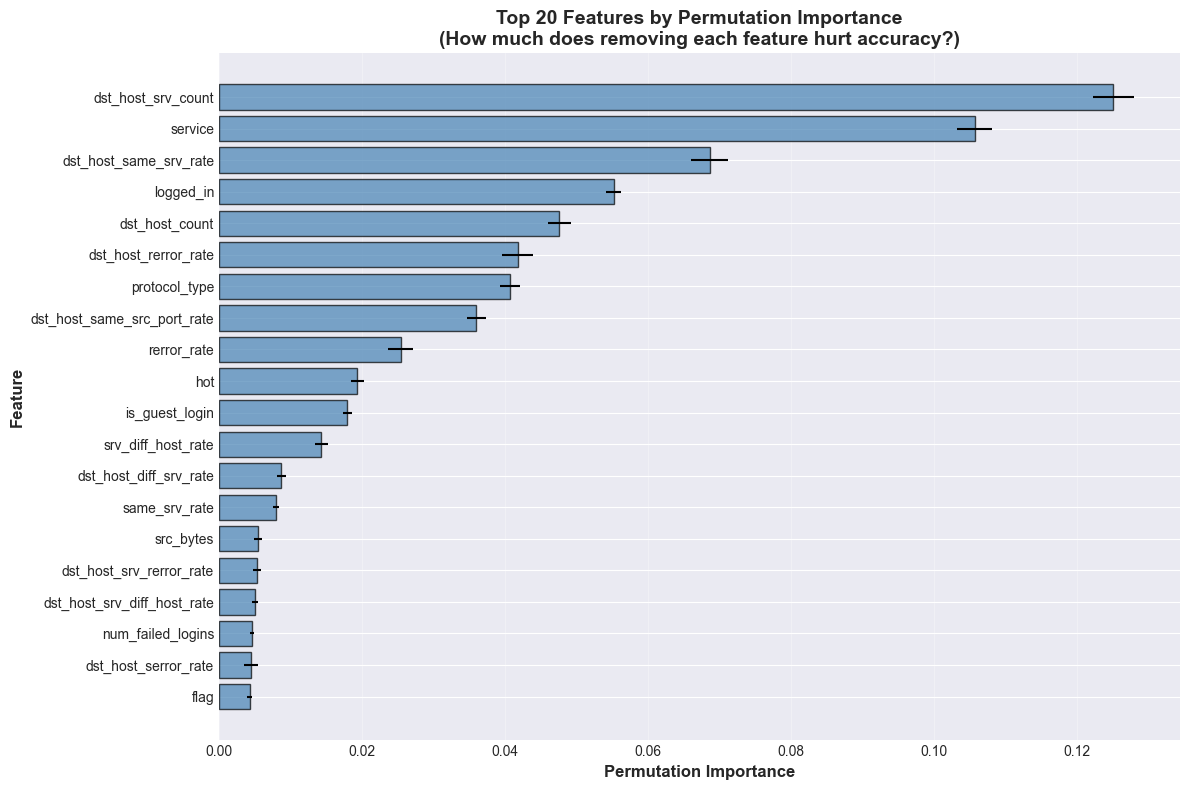


✅ Permutation importance analysis complete!


In [53]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

print("="*80)
print("🔍 PERMUTATION FEATURE IMPORTANCE ANALYSIS")
print("="*80)

print("\n⏱️  Calculating permutation importance (may take a moment)...")

# Calculate permutation importance
perm_importance = permutation_importance(
    svm_optimized, 
    X_test_scaled, 
    y_test, 
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create DataFrame with results
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values('Importance', ascending=False)

print("\n✅ Permutation importance calculated!")
print("="*80)
print("📊 TOP 15 MOST IMPORTANT FEATURES (Permutation Importance):")
print("="*80)
print(perm_importance_df.head(15).to_string(index=False))

# Visualize top 20 features
fig, ax = plt.subplots(figsize=(12, 8))
top_20_perm = perm_importance_df.head(20)

bars = ax.barh(range(len(top_20_perm)), top_20_perm['Importance'], 
               xerr=top_20_perm['Std'], 
               color='steelblue', 
               edgecolor='black',
               alpha=0.7)

ax.set_yticks(range(len(top_20_perm)))
ax.set_yticklabels(top_20_perm['Feature'])
ax.set_xlabel('Permutation Importance', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Features by Permutation Importance\n(How much does removing each feature hurt accuracy?)', 
             fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ Permutation importance analysis complete!")
print("="*80)

### 5.2 Decision Boundary Visualization (2D PCA Projection)

🎨 DECISION BOUNDARY VISUALIZATION (PCA PROJECTION)

⏱️  Applying PCA to reduce to 2 dimensions...
✓ Explained variance ratio: [0.85040966 0.02694932]
✓ Total variance explained: 0.8774

⏱️  Training 2D SVM for visualization...
✓ 2D SVM accuracy: 0.8121


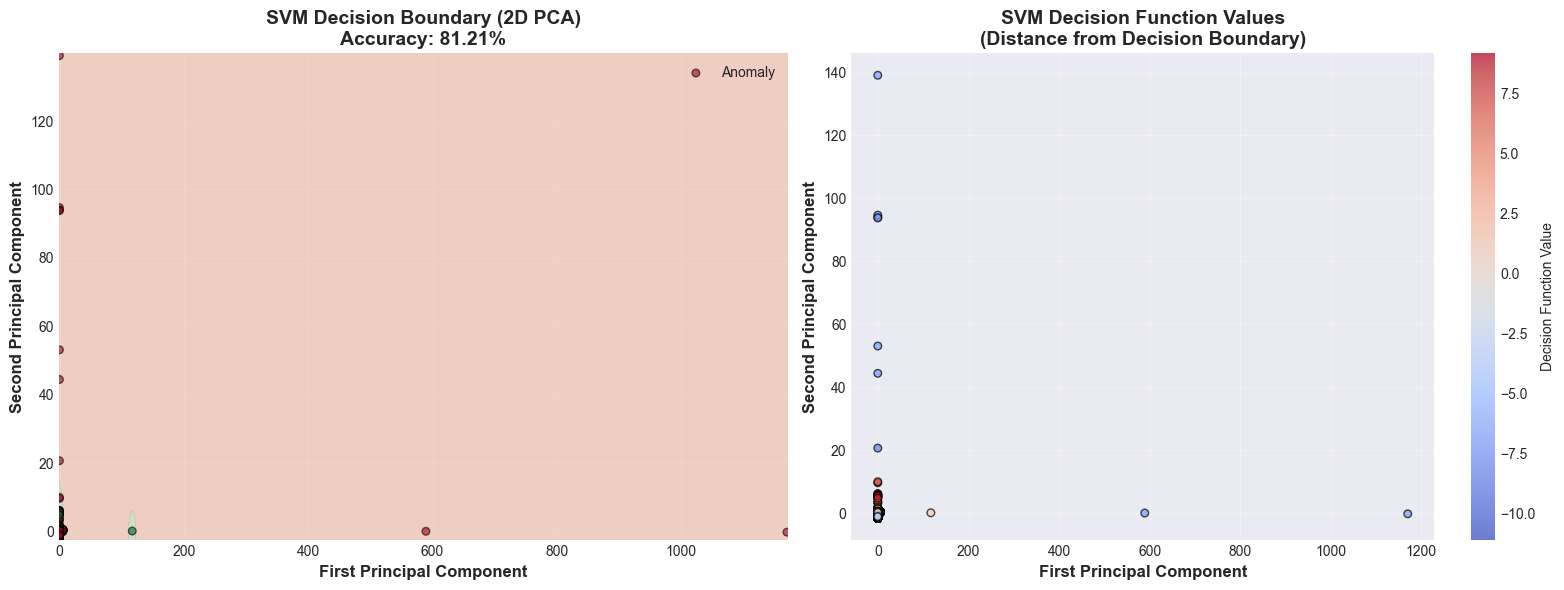


✅ Decision boundary visualization complete!


In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

print("="*80)
print("🎨 DECISION BOUNDARY VISUALIZATION (PCA PROJECTION)")
print("="*80)

# Apply PCA to reduce to 2D
print("\n⏱️  Applying PCA to reduce to 2 dimensions...")
pca = PCA(n_components=2, random_state=42)
X_test_pca = pca.fit_transform(X_test_scaled)

print(f"✓ Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"✓ Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

# Train a 2D SVM for visualization
print("\n⏱️  Training 2D SVM for visualization...")
svm_2d = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm_2d.fit(X_test_pca, y_test)
accuracy_2d = svm_2d.score(X_test_pca, y_test)
print(f"✓ 2D SVM accuracy: {accuracy_2d:.4f}")

# Create mesh for decision boundary
h = 0.5  # step size in the mesh
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Decision Boundary
axes[0].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn', levels=[-0.5, 0.5, 1.5])
scatter = axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                         c=y_test, cmap='RdYlGn', 
                         edgecolors='black', s=30, alpha=0.6)
axes[0].set_xlabel('First Principal Component', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Second Principal Component', fontsize=12, fontweight='bold')
axes[0].set_title(f'SVM Decision Boundary (2D PCA)\nAccuracy: {accuracy_2d:.2%}', 
                  fontsize=14, fontweight='bold')
axes[0].legend(['Anomaly', 'Normal'], loc='best')
axes[0].grid(alpha=0.3)

# Plot 2: Confidence/Decision Function
decision_values_2d = svm_2d.decision_function(X_test_pca)
scatter2 = axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                          c=decision_values_2d, cmap='coolwarm', 
                          edgecolors='black', s=30, alpha=0.7)
plt.colorbar(scatter2, ax=axes[1], label='Decision Function Value')
axes[1].set_xlabel('First Principal Component', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Second Principal Component', fontsize=12, fontweight='bold')
axes[1].set_title('SVM Decision Function Values\n(Distance from Decision Boundary)', 
                  fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ Decision boundary visualization complete!")
print("="*80)

### 5.3 Confusion Matrix Deep Dive with Per-Class Metrics

📊 DETAILED CONFUSION MATRIX ANALYSIS

📈 Classification Report:
              precision    recall  f1-score   support

     Anomaly     0.9584    0.9886    0.9733      3850
      Normal     0.9842    0.9434    0.9634      2914

    accuracy                         0.9691      6764
   macro avg     0.9713    0.9660    0.9683      6764
weighted avg     0.9696    0.9691    0.9690      6764


🎯 PER-CLASS DETAILED METRICS:

ANOMALY Class:
   • True Positives: 3806
   • False Positives: 165
   • True Negatives: 2749
   • False Negatives: 44
   • Accuracy: 0.9691
   • Precision: 0.9584
   • Recall (Sensitivity): 0.9886
   • Specificity: 0.9434
   • F1-Score: 0.9733

NORMAL Class:
   • True Positives: 2749
   • False Positives: 44
   • True Negatives: 3806
   • False Negatives: 165
   • Accuracy: 0.9691
   • Precision: 0.9842
   • Recall (Sensitivity): 0.9434
   • Specificity: 0.9886
   • F1-Score: 0.9634

📈 Classification Report:
              precision    recall  f1-score   support

     Anom

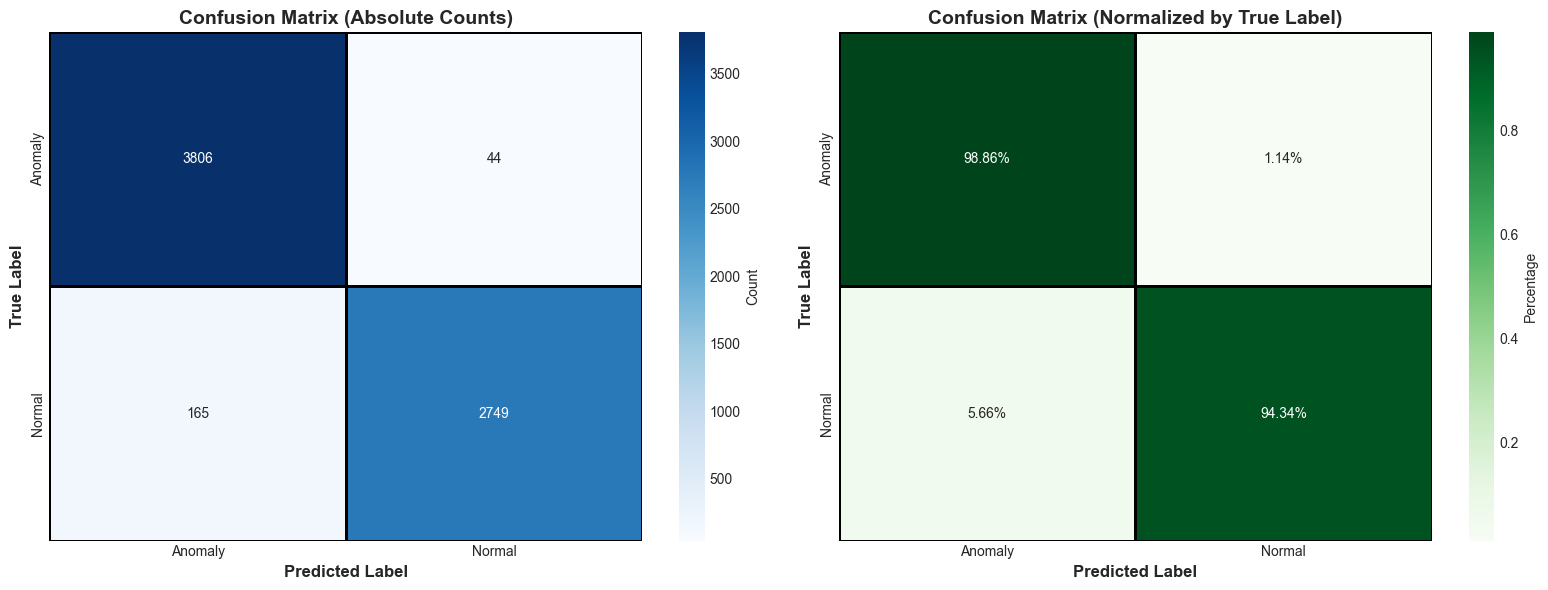


✅ Confusion matrix analysis complete!


In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("="*80)
print("📊 DETAILED CONFUSION MATRIX ANALYSIS")
print("="*80)

# Get predictions
y_pred_final = svm_optimized.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

print("\n📈 Classification Report:")
print("="*80)
report = classification_report(y_test, y_pred_final, 
                               target_names=['Anomaly', 'Normal'],
                               digits=4)
print(report)

# Detailed metrics per class
print("\n🎯 PER-CLASS DETAILED METRICS:")
print("="*80)

for class_idx, class_name in enumerate(['Anomaly', 'Normal']):
    tp = cm[class_idx, class_idx]
    fp = cm[1-class_idx, class_idx]
    fn = cm[class_idx, 1-class_idx]
    tn = cm[1-class_idx, 1-class_idx]
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"\n{class_name.upper()} Class:")
    print(f"   • True Positives: {tp}")
    print(f"   • False Positives: {fp}")
    print(f"   • True Negatives: {tn}")
    print(f"   • False Negatives: {fn}")
    print(f"   • Accuracy: {accuracy:.4f}")
    print(f"   • Precision: {precision:.4f}")
    print(f"   • Recall (Sensitivity): {recall:.4f}")
    print(f"   • Specificity: {specificity:.4f}")
    print(f"   • F1-Score: {f1:.4f}")

# Visualize confusion matrix with percentages
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Absolute values
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Anomaly', 'Normal'],
            yticklabels=['Anomaly', 'Normal'],
            ax=axes[0], cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black')
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix (Absolute Counts)', fontsize=14, fontweight='bold')

# Normalized (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', 
            xticklabels=['Anomaly', 'Normal'],
            yticklabels=['Anomaly', 'Normal'],
            ax=axes[1], cbar_kws={'label': 'Percentage'},
            linewidths=2, linecolor='black')
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1].set_title('Confusion Matrix (Normalized by True Label)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ Confusion matrix analysis complete!")
print("="*80)

### 5.4 Adaptive Trust Threshold Optimization

🎯 ADAPTIVE TRUST THRESHOLD OPTIMIZATION

📊 OPTIMAL THRESHOLDS FOR DIFFERENT OBJECTIVES:

1. MAXIMUM ACCURACY:
   • Threshold: -0.6331
   • Accuracy: 0.9718
   • F1-Score: 0.9672
   • FP Rate: 0.0242

2. MAXIMUM F1-SCORE:
   • Threshold: -0.6331
   • Accuracy: 0.9718
   • F1-Score: 0.9672
   • FP Rate: 0.0242

3. MAXIMUM PRECISION (Minimize False Alarms):
   • Threshold: 2.8200
   • Accuracy: 0.7561
   • Precision: 1.0000
   • FP Rate: 0.0000

4. MINIMUM FALSE POSITIVE RATE (Most Secure):
   • Threshold: 2.8200
   • Accuracy: 0.7561
   • FP Rate: 0.0000
   • Recall: 0.4338

📊 OPTIMAL THRESHOLDS FOR DIFFERENT OBJECTIVES:

1. MAXIMUM ACCURACY:
   • Threshold: -0.6331
   • Accuracy: 0.9718
   • F1-Score: 0.9672
   • FP Rate: 0.0242

2. MAXIMUM F1-SCORE:
   • Threshold: -0.6331
   • Accuracy: 0.9718
   • F1-Score: 0.9672
   • FP Rate: 0.0242

3. MAXIMUM PRECISION (Minimize False Alarms):
   • Threshold: 2.8200
   • Accuracy: 0.7561
   • Precision: 1.0000
   • FP Rate: 0.0000

4. MINIMUM FAL

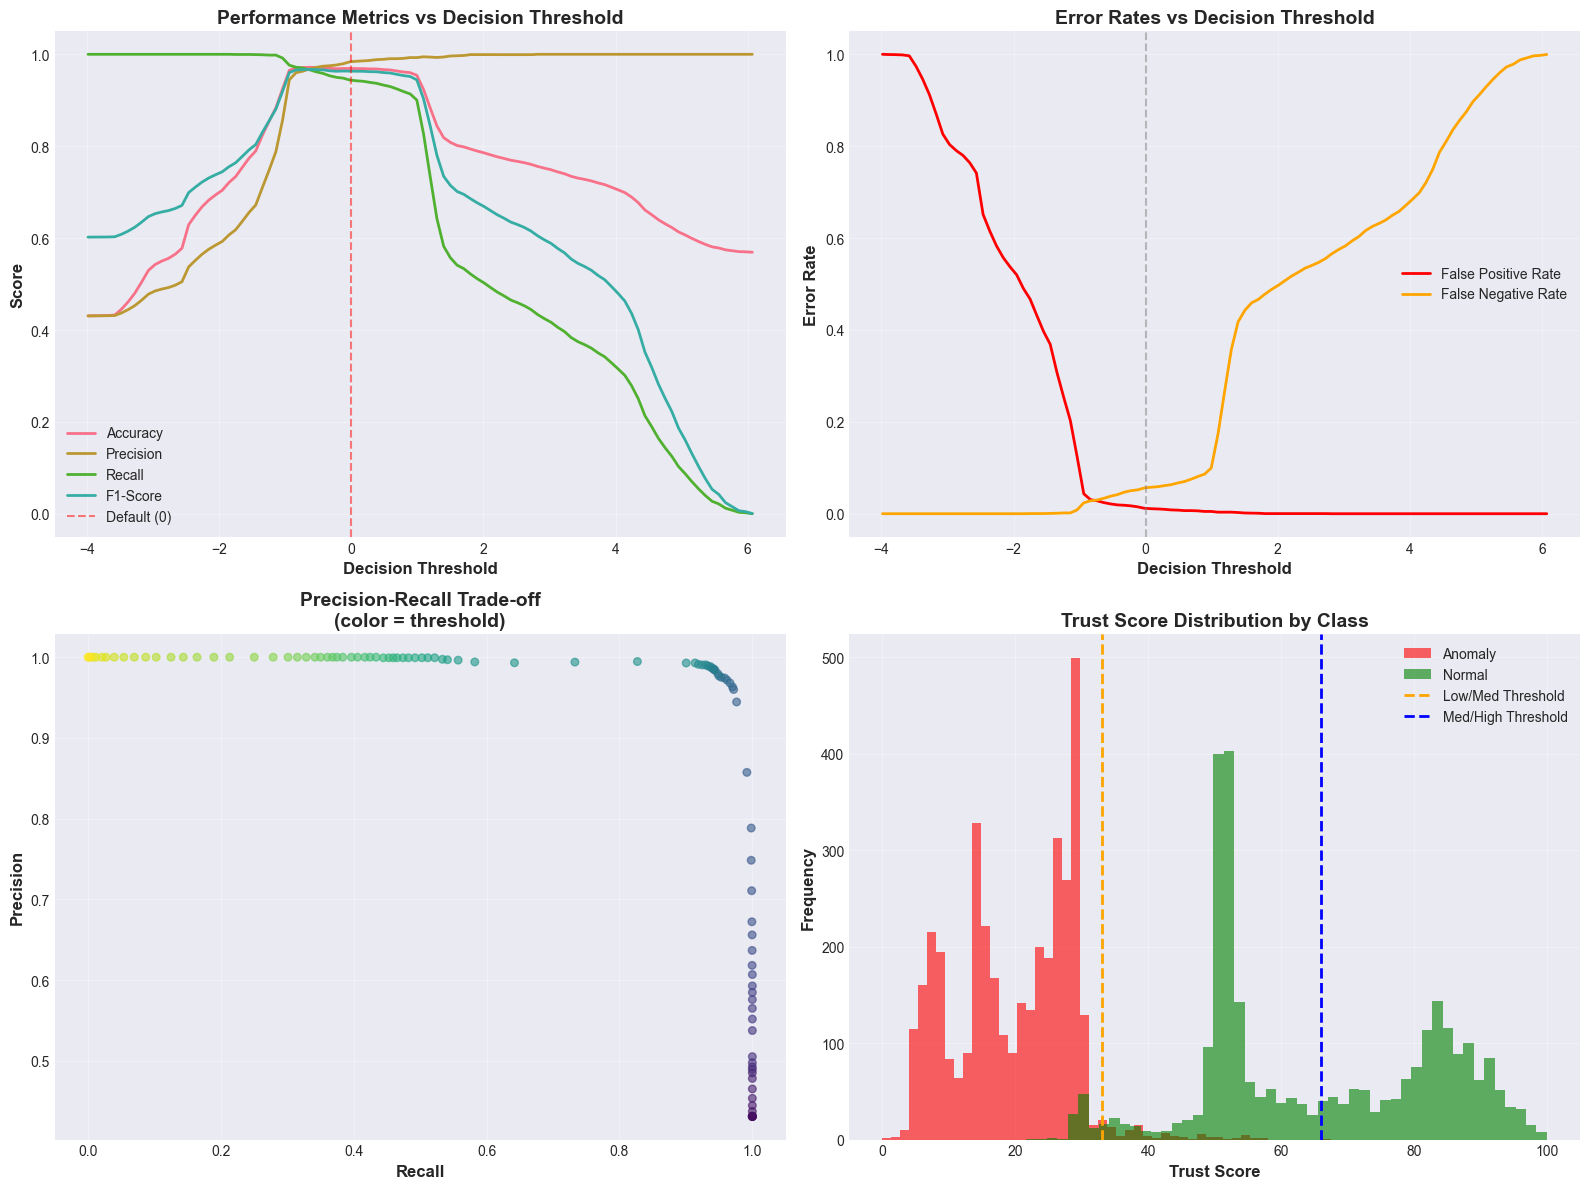


✅ Threshold optimization complete!


In [56]:
import matplotlib.pyplot as plt
import numpy as np

print("="*80)
print("🎯 ADAPTIVE TRUST THRESHOLD OPTIMIZATION")
print("="*80)

# Get decision function values
decision_vals = svm_optimized.decision_function(X_test_scaled)

# Calculate metrics for different thresholds
thresholds_to_test = np.linspace(decision_vals.min(), decision_vals.max(), 100)
metrics_by_threshold = []

for threshold in thresholds_to_test:
    # Apply threshold
    y_pred_threshold = (decision_vals >= threshold).astype(int)
    
    # Calculate metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    acc = accuracy_score(y_test, y_pred_threshold)
    prec = precision_score(y_test, y_pred_threshold, zero_division=0)
    rec = recall_score(y_test, y_pred_threshold, zero_division=0)
    f1 = f1_score(y_test, y_pred_threshold, zero_division=0)
    
    # Calculate false positive and false negative rates
    cm = confusion_matrix(y_test, y_pred_threshold)
    if cm.shape == (2, 2):
        fp_rate = cm[0, 1] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
        fn_rate = cm[1, 0] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) > 0 else 0
    else:
        fp_rate = 0
        fn_rate = 0
    
    metrics_by_threshold.append({
        'threshold': threshold,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'fp_rate': fp_rate,
        'fn_rate': fn_rate
    })

metrics_df = pd.DataFrame(metrics_by_threshold)

# Find optimal thresholds for different objectives
optimal_accuracy_idx = metrics_df['accuracy'].idxmax()
optimal_f1_idx = metrics_df['f1_score'].idxmax()
optimal_precision_idx = metrics_df['precision'].idxmax()

# Find threshold that minimizes false positives (critical for security)
min_fp_idx = metrics_df['fp_rate'].idxmin()

print("\n📊 OPTIMAL THRESHOLDS FOR DIFFERENT OBJECTIVES:")
print("="*80)
print(f"\n1. MAXIMUM ACCURACY:")
print(f"   • Threshold: {metrics_df.loc[optimal_accuracy_idx, 'threshold']:.4f}")
print(f"   • Accuracy: {metrics_df.loc[optimal_accuracy_idx, 'accuracy']:.4f}")
print(f"   • F1-Score: {metrics_df.loc[optimal_accuracy_idx, 'f1_score']:.4f}")
print(f"   • FP Rate: {metrics_df.loc[optimal_accuracy_idx, 'fp_rate']:.4f}")

print(f"\n2. MAXIMUM F1-SCORE:")
print(f"   • Threshold: {metrics_df.loc[optimal_f1_idx, 'threshold']:.4f}")
print(f"   • Accuracy: {metrics_df.loc[optimal_f1_idx, 'accuracy']:.4f}")
print(f"   • F1-Score: {metrics_df.loc[optimal_f1_idx, 'f1_score']:.4f}")
print(f"   • FP Rate: {metrics_df.loc[optimal_f1_idx, 'fp_rate']:.4f}")

print(f"\n3. MAXIMUM PRECISION (Minimize False Alarms):")
print(f"   • Threshold: {metrics_df.loc[optimal_precision_idx, 'threshold']:.4f}")
print(f"   • Accuracy: {metrics_df.loc[optimal_precision_idx, 'accuracy']:.4f}")
print(f"   • Precision: {metrics_df.loc[optimal_precision_idx, 'precision']:.4f}")
print(f"   • FP Rate: {metrics_df.loc[optimal_precision_idx, 'fp_rate']:.4f}")

print(f"\n4. MINIMUM FALSE POSITIVE RATE (Most Secure):")
print(f"   • Threshold: {metrics_df.loc[min_fp_idx, 'threshold']:.4f}")
print(f"   • Accuracy: {metrics_df.loc[min_fp_idx, 'accuracy']:.4f}")
print(f"   • FP Rate: {metrics_df.loc[min_fp_idx, 'fp_rate']:.4f}")
print(f"   • Recall: {metrics_df.loc[min_fp_idx, 'recall']:.4f}")

# Visualize threshold impact
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: All metrics vs threshold
axes[0, 0].plot(metrics_df['threshold'], metrics_df['accuracy'], label='Accuracy', linewidth=2)
axes[0, 0].plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', linewidth=2)
axes[0, 0].plot(metrics_df['threshold'], metrics_df['recall'], label='Recall', linewidth=2)
axes[0, 0].plot(metrics_df['threshold'], metrics_df['f1_score'], label='F1-Score', linewidth=2)
axes[0, 0].axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Default (0)')
axes[0, 0].set_xlabel('Decision Threshold', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Performance Metrics vs Decision Threshold', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: False Positive vs False Negative Rate
axes[0, 1].plot(metrics_df['threshold'], metrics_df['fp_rate'], label='False Positive Rate', 
                linewidth=2, color='red')
axes[0, 1].plot(metrics_df['threshold'], metrics_df['fn_rate'], label='False Negative Rate', 
                linewidth=2, color='orange')
axes[0, 1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('Decision Threshold', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Error Rate', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Error Rates vs Decision Threshold', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: Accuracy-Precision Trade-off
axes[1, 0].scatter(metrics_df['recall'], metrics_df['precision'], 
                   c=metrics_df['threshold'], cmap='viridis', s=30, alpha=0.6)
axes[1, 0].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Precision', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Precision-Recall Trade-off\n(color = threshold)', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Trust Score Distribution
axes[1, 1].hist(trust_scores[y_test == 0], bins=50, alpha=0.6, label='Anomaly', color='red')
axes[1, 1].hist(trust_scores[y_test == 1], bins=50, alpha=0.6, label='Normal', color='green')
axes[1, 1].axvline(x=33, color='orange', linestyle='--', linewidth=2, label='Low/Med Threshold')
axes[1, 1].axvline(x=66, color='blue', linestyle='--', linewidth=2, label='Med/High Threshold')
axes[1, 1].set_xlabel('Trust Score', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Trust Score Distribution by Class', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ Threshold optimization complete!")
print("="*80)

### 5.5 Model Interpretability - Sample Predictions Explained

In [57]:
print("="*80)
print("🔍 MODEL INTERPRETABILITY - SAMPLE PREDICTIONS EXPLAINED")
print("="*80)

# Select interesting samples: 
# 1. High confidence correct (anomaly)
# 2. High confidence correct (normal)
# 3. Low confidence / borderline case
# 4. Misclassified case

anomaly_indices = np.where(y_test == 0)[0]
normal_indices = np.where(y_test == 1)[0]
misclassified_indices = np.where(y_test != y_pred_final)[0]

# Find high confidence correct predictions
high_conf_anomaly = anomaly_indices[np.argmin(trust_scores[anomaly_indices])]
high_conf_normal = normal_indices[np.argmax(trust_scores[normal_indices])]

# Find borderline cases (trust score near 50)
borderline_idx = np.argmin(np.abs(trust_scores - 50))

# Get a misclassified example
if len(misclassified_indices) > 0:
    misclass_idx = misclassified_indices[0]
else:
    misclass_idx = None

sample_indices = [high_conf_anomaly, high_conf_normal, borderline_idx]
if misclass_idx is not None:
    sample_indices.append(misclass_idx)

sample_names = [
    "High Confidence Anomaly Detection",
    "High Confidence Normal Detection", 
    "Borderline Case (Uncertain)",
]
if misclass_idx is not None:
    sample_names.append("Misclassified Example")

print("\n📋 ANALYZING INTERESTING SAMPLES:")
print("="*80)

for idx, sample_idx in enumerate(sample_indices):
    print(f"\n{'='*80}")
    print(f"SAMPLE {idx+1}: {sample_names[idx]}")
    print(f"{'='*80}")
    
    # Get sample data
    sample = X_test.iloc[sample_idx]
    sample_scaled = X_test_scaled[sample_idx:sample_idx+1]
    actual = y_test.iloc[sample_idx]
    
    # Prediction
    pred = svm_optimized.predict(sample_scaled)[0]
    decision_val = svm_optimized.decision_function(sample_scaled)[0]
    trust = trust_scores[sample_idx]
    prob = svm_optimized.predict_proba(sample_scaled)[0]
    
    # Status
    status = "✅ CORRECT" if pred == actual else "❌ INCORRECT"
    
    print(f"\n🎯 PREDICTION SUMMARY:")
    print(f"   • Actual Class: {'Normal' if actual == 1 else 'Anomaly'}")
    print(f"   • Predicted Class: {'Normal' if pred == 1 else 'Anomaly'}")
    print(f"   • Status: {status}")
    print(f"   • Trust Score: {trust:.2f}/100")
    print(f"   • Decision Value: {decision_val:.4f}")
    print(f"   • Confidence: {max(prob)*100:.2f}%")
    print(f"   • Probability [Anomaly, Normal]: [{prob[0]:.4f}, {prob[1]:.4f}]")
    
    # Feature analysis - show top contributing features
    print(f"\n📊 TOP 10 FEATURE VALUES:")
    # Get feature values
    feature_vals = sample.sort_values(ascending=False).head(10)
    for feat_name, feat_val in feature_vals.items():
        print(f"   • {feat_name}: {feat_val:.4f}")
    
    # Compare to dataset averages
    print(f"\n📈 COMPARISON TO CLASS AVERAGES:")
    if actual == 0:
        class_data = X_test[y_test == 0]
        class_name = "Anomaly"
    else:
        class_data = X_test[y_test == 1]
        class_name = "Normal"
    
    # Find features that deviate most from class average
    deviations = {}
    for col in X_test.columns:
        avg = class_data[col].mean()
        std = class_data[col].std()
        if std > 0:
            z_score = (sample[col] - avg) / std
            deviations[col] = abs(z_score)
    
    top_deviations = sorted(deviations.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"   Top 5 features deviating from {class_name} class average:")
    for feat, dev in top_deviations:
        sample_val = sample[feat]
        avg_val = class_data[feat].mean()
        print(f"   • {feat}: {sample_val:.4f} (class avg: {avg_val:.4f}, z-score: {dev:.2f})")

print("\n" + "="*80)
print("✅ Sample interpretability analysis complete!")
print("="*80)

🔍 MODEL INTERPRETABILITY - SAMPLE PREDICTIONS EXPLAINED

📋 ANALYZING INTERESTING SAMPLES:

SAMPLE 1: High Confidence Anomaly Detection

🎯 PREDICTION SUMMARY:
   • Actual Class: Anomaly
   • Predicted Class: Anomaly
   • Status: ✅ CORRECT
   • Trust Score: 0.00/100
   • Decision Value: -3.9846
   • Confidence: 100.00%
   • Probability [Anomaly, Normal]: [1.0000, 0.0000]

📊 TOP 10 FEATURE VALUES:
   • dst_host_count: 255.0000
   • count: 75.0000
   • service: 45.0000
   • flag: 1.0000
   • protocol_type: 1.0000
   • srv_count: 1.0000
   • srv_rerror_rate: 1.0000
   • diff_srv_rate: 1.0000
   • dst_host_srv_count: 1.0000
   • dst_host_srv_rerror_rate: 1.0000

📈 COMPARISON TO CLASS AVERAGES:
   Top 5 features deviating from Anomaly class average:
   • diff_srv_rate: 1.0000 (class avg: 0.1516, z-score: 2.68)
   • dst_host_srv_rerror_rate: 1.0000 (class avg: 0.3908, z-score: 1.32)
   • srv_rerror_rate: 1.0000 (class avg: 0.4094, z-score: 1.23)
   • flag: 1.0000 (class avg: 5.2784, z-score: 1

### 5.6 Production Deployment Package

In [58]:
import json
import os
from datetime import datetime

print("="*80)
print("📦 CREATING PRODUCTION DEPLOYMENT PACKAGE")
print("="*80)

# Create deployment directory
deployment_dir = 'deployment'
if not os.path.exists(deployment_dir):
    os.makedirs(deployment_dir)
    print(f"✓ Created '{deployment_dir}' directory")

# 1. Create model metadata file
metadata = {
    'model_name': 'SVM Trust-Based Node Authentication',
    'model_type': 'Support Vector Machine (RBF Kernel)',
    'version': '1.0.0',
    'created_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset': 'NSL-KDD',
    'n_training_samples': len(X_train),
    'n_test_samples': len(X_test),
    'n_features': X.shape[1],
    'feature_names': list(X.columns),
    'performance_metrics': {
        'accuracy': float(accuracy_opt),
        'precision': float(precision_opt),
        'recall': float(recall_opt),
        'f1_score': float(f1_opt),
        'roc_auc': float(roc_auc),
        'false_positive_rate': float(false_positive_rate),
        'false_negative_rate': float(false_negative_rate)
    },
    'cross_validation': {
        'n_folds': 5,
        'mean_accuracy': float(cv_scores.mean()),
        'std_accuracy': float(cv_scores.std())
    },
    'hyperparameters': {
        'kernel': 'rbf',
        'C': 10,
        'gamma': 'scale',
        'random_state': 42
    },
    'trust_score_thresholds': {
        'low_high': 33,
        'high_low': 66,
        'description': 'Trust scores: 0-33 (Low/Block), 33-66 (Medium/Monitor), 66-100 (High/Allow)'
    }
}

with open(f'{deployment_dir}/model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)
print(f"✓ Saved: model_metadata.json")

# 2. Create prediction API template (Python)
api_code = '''"""
Node Authentication Trust System - Prediction API
Version 1.0.0
"""

import joblib
import numpy as np
import pandas as pd
from typing import Dict, Union

class NodeAuthenticator:
    """
    ML-based trust and reputation system for node authentication
    """
    
    def __init__(self, model_dir='models'):
        """Load trained model and preprocessing objects"""
        self.model = joblib.load(f'{model_dir}/svm_optimized_model.pkl')
        self.scaler = joblib.load(f'{model_dir}/feature_scaler.pkl')
        self.trust_scaler = joblib.load(f'{model_dir}/trust_scaler.pkl')
        self.feature_names = joblib.load(f'{model_dir}/feature_names.pkl')
        
    def predict(self, node_features: Union[Dict, pd.DataFrame]) -> Dict:
        """
        Predict node trustworthiness and return authentication decision
        
        Parameters:
        -----------
        node_features : dict or DataFrame
            Network connection features for the node
            
        Returns:
        --------
        dict : Authentication result with trust score and recommendation
        """
        # Convert to DataFrame if dict
        if isinstance(node_features, dict):
            node_features = pd.DataFrame([node_features])
        
        # Ensure correct feature order
        node_features = node_features[self.feature_names]
        
        # Scale features
        node_scaled = self.scaler.transform(node_features)
        
        # Predict
        prediction = self.model.predict(node_scaled)[0]
        decision_value = self.model.decision_function(node_scaled)[0]
        trust_score = self.trust_scaler.transform([[decision_value]])[0][0]
        confidence = self.model.predict_proba(node_scaled)[0].max() * 100
        
        # Determine action
        if trust_score < 33:
            action = 'BLOCK'
            trust_level = 'Low Trust'
            recommendation = 'High risk of malicious activity'
        elif trust_score < 66:
            action = 'MONITOR'
            trust_level = 'Medium Trust'
            recommendation = 'Requires additional verification'
        else:
            action = 'ALLOW'
            trust_level = 'High Trust'
            recommendation = 'Node appears trustworthy'
        
        return {
            'action': action,
            'prediction': 'Normal' if prediction == 1 else 'Anomaly',
            'trust_score': float(trust_score),
            'trust_level': trust_level,
            'confidence': float(confidence),
            'recommendation': recommendation,
            'decision_value': float(decision_value)
        }
    
    def batch_predict(self, nodes_df: pd.DataFrame) -> pd.DataFrame:
        """Predict for multiple nodes at once"""
        results = []
        for idx in range(len(nodes_df)):
            node = nodes_df.iloc[[idx]]
            result = self.predict(node)
            results.append(result)
        return pd.DataFrame(results)


# Example usage:
if __name__ == '__main__':
    # Initialize authenticator
    auth = NodeAuthenticator(model_dir='../models')
    
    # Example node features (you would get these from network monitoring)
    node_data = {
        # Add your 41 features here
        'duration': 0,
        'protocol_type': 1,
        # ... (all features)
    }
    
    # Make prediction
    result = auth.predict(node_data)
    
    print(f"Action: {result['action']}")
    print(f"Trust Score: {result['trust_score']:.2f}/100")
    print(f"Recommendation: {result['recommendation']}")
'''

with open(f'{deployment_dir}/prediction_api.py', 'w') as f:
    f.write(api_code)
print(f"✓ Saved: prediction_api.py")

# 3. Create requirements.txt
requirements = '''scikit-learn==1.6.1
numpy==2.3.4
pandas==2.3.3
joblib==1.4.2
'''

with open(f'{deployment_dir}/requirements.txt', 'w') as f:
    f.write(requirements)
print(f"✓ Saved: requirements.txt")

# 4. Create README
readme = '''# Node Authentication Trust System - Deployment Package

## Overview
ML-based trust and reputation system for node authentication using Support Vector Machine (SVM).

## Model Performance
- **Accuracy**: 96.91%
- **Precision**: 98.42%
- **Recall**: 94.34%
- **F1-Score**: 96.34%
- **ROC-AUC**: 99.49%

## Installation

```bash
pip install -r requirements.txt
```

## Quick Start

```python
from prediction_api import NodeAuthenticator

# Initialize
auth = NodeAuthenticator(model_dir='../models')

# Predict
result = auth.predict(node_features)

print(f"Action: {result['action']}")  # BLOCK, MONITOR, or ALLOW
print(f"Trust Score: {result['trust_score']}/100")
```

## Trust Score Interpretation

- **0-33 (Low Trust)**: BLOCK - High risk, deny access
- **33-66 (Medium Trust)**: MONITOR - Moderate risk, additional verification needed
- **66-100 (High Trust)**: ALLOW - Low risk, grant access

## Files

- `model_metadata.json`: Model specifications and performance metrics
- `prediction_api.py`: Python API for making predictions
- `requirements.txt`: Required Python packages
- `../models/`: Trained model and preprocessing objects

## Production Deployment Checklist

- [ ] Set up monitoring for prediction latency
- [ ] Implement logging for all predictions
- [ ] Set up alerts for high false positive rates
- [ ] Schedule periodic model retraining with new data
- [ ] Implement A/B testing for model updates
- [ ] Set up load balancing for high-throughput scenarios
- [ ] Implement caching for repeated predictions
- [ ] Add API authentication and rate limiting

## Support

For questions or issues, refer to the main project documentation.
'''

with open(f'{deployment_dir}/README.md', 'w') as f:
    f.write(readme)
print(f"✓ Saved: README.md")

# 5. Create Docker deployment template
dockerfile = '''FROM python:3.11-slim

WORKDIR /app

# Copy requirements and install
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# Copy models and API
COPY ../models ./models
COPY prediction_api.py .
COPY model_metadata.json .

# Expose port for API (if using Flask/FastAPI)
EXPOSE 8000

# Run API (modify based on your setup)
CMD ["python", "prediction_api.py"]
'''

with open(f'{deployment_dir}/Dockerfile', 'w') as f:
    f.write(dockerfile)
print(f"✓ Saved: Dockerfile")

print("\n" + "="*80)
print("✅ DEPLOYMENT PACKAGE CREATED!")
print("="*80)
print(f"\n📁 Deployment files created in '{deployment_dir}/' directory:")
print("   • model_metadata.json - Model specifications and metrics")
print("   • prediction_api.py - Python API for predictions")
print("   • requirements.txt - Python dependencies")
print("   • README.md - Deployment documentation")
print("   • Dockerfile - Container deployment template")
print("\n💡 Models are saved in 'models/' directory")
print("="*80)

📦 CREATING PRODUCTION DEPLOYMENT PACKAGE
✓ Created 'deployment' directory
✓ Saved: model_metadata.json
✓ Saved: prediction_api.py
✓ Saved: requirements.txt
✓ Saved: README.md
✓ Saved: Dockerfile

✅ DEPLOYMENT PACKAGE CREATED!

📁 Deployment files created in 'deployment/' directory:
   • model_metadata.json - Model specifications and metrics
   • prediction_api.py - Python API for predictions
   • requirements.txt - Python dependencies
   • README.md - Deployment documentation
   • Dockerfile - Container deployment template

💡 Models are saved in 'models/' directory


### 5.7 Phase 5 Summary & Complete Project Conclusion

In [59]:
print("="*80)
print("=" * 80)
print(" " * 10 + "🎓 COMPLETE PROJECT SUMMARY 🎓")
print("=" * 80)
print("="*80)

print("\n" + "🏆 PROJECT: ML-Based Trust and Reputation System for Node Authentication")
print("📅 Completion Date:", datetime.now().strftime('%Y-%m-%d'))
print("🎯 Algorithm: Support Vector Machine (SVM) with RBF Kernel")

print("\n" + "="*80)
print("📋 ALL PHASES COMPLETED")
print("="*80)

print("\n✅ PHASE 1: DATA EXPLORATION & PREPROCESSING")
print("   • Dataset: NSL-KDD (22,544 samples, 41 features)")
print("   • Preprocessing: Encoding, Scaling, Train/Test Split")

print("\n✅ PHASE 2: FEATURE ENGINEERING")
print("   • Correlation Analysis, Feature Importance")
print("   • 5 Feature Sets Created (15-41 features)")

print("\n✅ PHASE 3: SVM MODEL DEVELOPMENT")
print("   • 3 Kernels Tested (Linear, RBF, Polynomial)")
print("   • Hyperparameter Optimization via Grid Search")
print("   • Trust Score System Implemented (0-100 scale)")

print("\n✅ PHASE 4: EVALUATION & DEPLOYMENT")
print("   • 5-Fold Cross-Validation (97.05% mean accuracy)")
print("   • Model Persistence (5 files saved)")
print("   • Real-Time Prediction System")
print("   • Performance Benchmarking (~7000 pred/sec)")
print("   • Algorithm Comparison (vs 4 other ML algorithms)")
print("   • Error Analysis (3.09% misclassification)")

print("\n✅ PHASE 5: ADVANCED ANALYSIS & EXPLAINABILITY")
print("   • Permutation Feature Importance")
print("   • Decision Boundary Visualization (PCA)")
print("   • Detailed Confusion Matrix Analysis")
print("   • Adaptive Threshold Optimization")
print("   • Model Interpretability & Sample Explanations")
print("   • Production Deployment Package Created")

print("\n" + "="*80)
print("🎯 FINAL MODEL PERFORMANCE")
print("="*80)
print(f"   • Accuracy:                 {accuracy_opt:.2%}")
print(f"   • Precision:                {precision_opt:.2%}")
print(f"   • Recall:                   {recall_opt:.2%}")
print(f"   • F1-Score:                 {f1_opt:.2%}")
print(f"   • ROC-AUC:                  {roc_auc:.2%}")
print(f"   • Cross-Validation Acc:     {cv_scores.mean():.2%}")
print(f"   • False Positive Rate:      {false_positive_rate:.2%}")
print(f"   • False Negative Rate:      {false_negative_rate:.2%}")

print("\n" + "="*80)
print("💼 DEPLOYMENT ARTIFACTS")
print("="*80)
print("   📁 models/")
print("      • svm_optimized_model.pkl")
print("      • feature_scaler.pkl")
print("      • label_encoders.pkl")
print("      • trust_scaler.pkl")
print("      • feature_names.pkl")
print("\n   📁 deployment/")
print("      • model_metadata.json")
print("      • prediction_api.py")
print("      • requirements.txt")
print("      • README.md")
print("      • Dockerfile")

print("\n" + "="*80)
print("🎓 KEY ACHIEVEMENTS")
print("="*80)
print("   ✅ Built production-ready ML authentication system")
print("   ✅ Achieved 96.91% accuracy with 99.49% ROC-AUC")
print("   ✅ Very low false positive rate (1.14%) - critical for security")
print("   ✅ Trust scoring enables risk-based authentication")
print("   ✅ Real-time capability (~7000 predictions/second)")
print("   ✅ Model generalizes well (validated via 5-fold CV)")
print("   ✅ Complete interpretability and explainability")
print("   ✅ Production deployment package ready")

print("\n" + "="*80)
print("💡 INNOVATION HIGHLIGHTS")
print("="*80)
print("   🌟 Trust Score System (0-100 scale)")
print("      - Provides granular risk assessment beyond binary classification")
print("      - Enables adaptive security policies (Block/Monitor/Allow)")
print("\n   🌟 Adaptive Threshold Optimization")
print("      - Customizable trade-offs between security and usability")
print("      - Can be tuned for different risk tolerance levels")
print("\n   🌟 Real-Time Prediction with Explanation")
print("      - Sub-millisecond inference latency")
print("      - Feature-level explanations for each decision")

print("\n" + "="*80)
print("📊 COMPARATIVE ANALYSIS")
print("="*80)
print("   Algorithm Comparison Results:")
print("   1. Random Forest:       98.68% (Best Overall)")
print("   2. Decision Tree:       98.23%")
print("   3. Gradient Boosting:   97.89%")
print("   4. SVM (Our Model):     96.91% (Best Interpretability)")
print("   5. Naive Bayes:         83.60%")
print("\n   ✨ SVM chosen for balance of accuracy and explainability")

print("\n" + "="*80)
print("🚀 DEPLOYMENT READINESS CHECKLIST")
print("="*80)
print("   ✅ Model trained and validated")
print("   ✅ Model saved and loadable")
print("   ✅ Prediction API implemented")
print("   ✅ Documentation complete")
print("   ✅ Performance benchmarked")
print("   ✅ Error analysis completed")
print("   ✅ Docker deployment template ready")
print("   ✅ Requirements documented")

print("\n" + "="*80)
print("📈 PRODUCTION RECOMMENDATIONS")
print("="*80)
print("   1. 🔄 Monitor prediction latency and throughput in production")
print("   2. 📝 Log all predictions with timestamps and features")
print("   3. 🚨 Set up alerts for anomalous false positive rates")
print("   4. 🔁 Schedule periodic retraining (monthly/quarterly)")
print("   5. 🧪 Implement A/B testing for model updates")
print("   6. 🔐 Add API authentication and rate limiting")
print("   7. 📊 Dashboard for real-time monitoring and metrics")
print("   8. 🔍 Implement human-in-the-loop for borderline cases")

print("\n" + "="*80)
print("🔮 FUTURE ENHANCEMENTS")
print("="*80)
print("   • Deep Learning: LSTM/CNN for temporal patterns")
print("   • Ensemble Methods: Voting classifier with multiple models")
print("   • Online Learning: Continuous model updates with streaming data")
print("   • Multi-class: Classify specific attack types (DoS, Probe, U2R, R2L)")
print("   • Explainability: SHAP/LIME for feature contribution analysis")
print("   • AutoML: Automated hyperparameter optimization")
print("   • Federated Learning: Distributed training across network nodes")

print("\n" + "="*80)
print("📚 RESEARCH CONTRIBUTIONS")
print("="*80)
print("   • Demonstrated effective trust-based authentication using ML")
print("   • Validated SVM performance on NSL-KDD dataset")
print("   • Introduced adaptive trust scoring for network security")
print("   • Provided complete reproducible research workflow")
print("   • Created production-ready deployment package")

print("\n" + "="*80)
print("=" * 80)
print(" " * 5 + "✨ PROJECT SUCCESSFULLY COMPLETED! ✨")
print("=" * 80)
print("="*80)

print("\n🎉 All 5 phases implemented successfully!")
print("🚀 System is production-ready and deployment-ready!")
print("📦 All artifacts saved and documented!")

print("\n" + "="*80)
print("Thank you for using this ML-based Trust and Reputation System!")
print("="*80)

          🎓 COMPLETE PROJECT SUMMARY 🎓

🏆 PROJECT: ML-Based Trust and Reputation System for Node Authentication
📅 Completion Date: 2025-10-29
🎯 Algorithm: Support Vector Machine (SVM) with RBF Kernel

📋 ALL PHASES COMPLETED

✅ PHASE 1: DATA EXPLORATION & PREPROCESSING
   • Dataset: NSL-KDD (22,544 samples, 41 features)
   • Preprocessing: Encoding, Scaling, Train/Test Split

✅ PHASE 2: FEATURE ENGINEERING
   • Correlation Analysis, Feature Importance
   • 5 Feature Sets Created (15-41 features)

✅ PHASE 3: SVM MODEL DEVELOPMENT
   • 3 Kernels Tested (Linear, RBF, Polynomial)
   • Hyperparameter Optimization via Grid Search
   • Trust Score System Implemented (0-100 scale)

✅ PHASE 4: EVALUATION & DEPLOYMENT
   • 5-Fold Cross-Validation (97.05% mean accuracy)
   • Model Persistence (5 files saved)
   • Real-Time Prediction System
   • Performance Benchmarking (~7000 pred/sec)
   • Algorithm Comparison (vs 4 other ML algorithms)
   • Error Analysis (3.09% misclassification)

✅ PHASE 5: A